# EDA, FE and Regression Model (Car Dekho Dataset)

# 1. EDA and FE

1.Data Profiling

2.Stastical analysis

3.Graphical Analysis

4.Data Cleaning

5.Data Scaling

# 2. Linear Regression Model

1.Linear Regression Model

2.Performance metrics for above model

# 3. Ridge, Lasso and Elastic-Net Regression Model

1.Ridge, Lasso and Elastic-Net Regression Model

2.Performance metrics for above model

# 4. Decision Tree Regressor Model

1.Decision Tree Regressor Model

2.Performance metrics for above model

3.Hyper-Parameter Tuning for above model

# 5. Support Vector Regressor Model

1.Support Vector Regressor Model

2.Performance metrics for above model

3.Hyper-Parameter Tuning for above model

# 6. Random Forest Regressor Model

1.Random Forest Regressor Model

2.Performance metrics for above model

3.Hyper-Parameter Tuning for above model

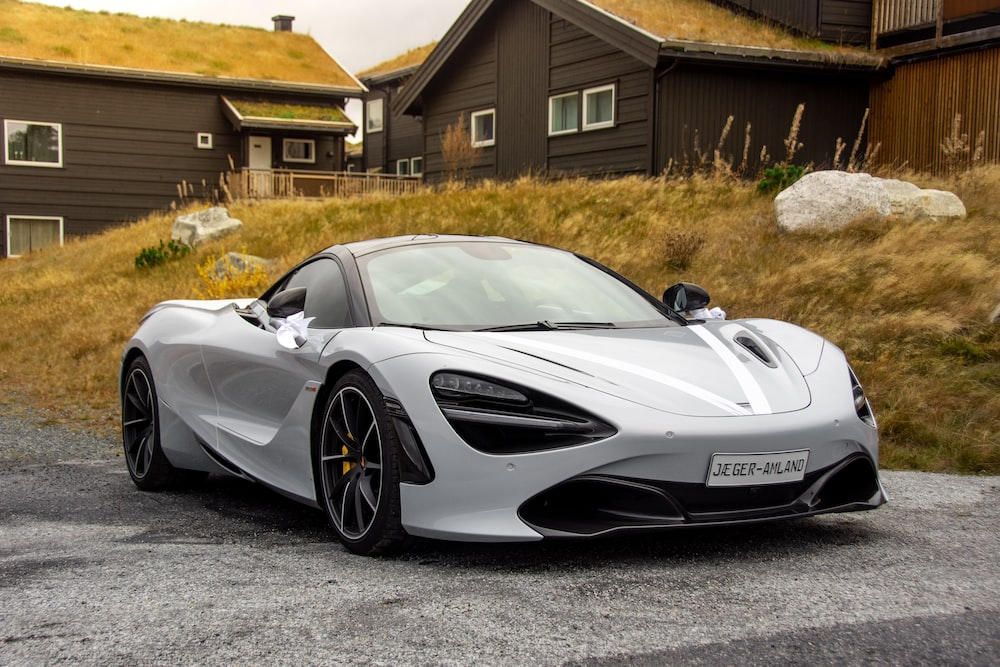

In [3]:
from IPython import display
display.Image("desktop/Datasets/car.jpg")

# <span style="color:red"> 1.0 Importing required libraries </span>

In [1]:
### Pandas and Numpy
import pandas as pd
import numpy as np

### Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### For Q-Q Plot
import scipy.stats as stats

### To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score 

### To be able to see maximum columns on screen
pd.set_option("display.max_columns",500)

# <span style="color:red"> 2.0 Importing dataset and performing descriptive analysis </span>

In [2]:
data = pd.read_csv("desktop/Datasets/cardekho_dataset.csv" ,usecols=['car_name','brand','model','vehicle_age','km_driven','seller_type','fuel_type','transmission_type','mileage','engine','max_power','seats','selling_price'])
data.head()

car_name    brand     model  vehicle_age  km_driven seller_type  \
0    Maruti Alto   Maruti      Alto            9     120000  Individual   
1  Hyundai Grand  Hyundai     Grand            5      20000  Individual   
2    Hyundai i20  Hyundai       i20           11      60000  Individual   
3    Maruti Alto   Maruti      Alto            9      37000  Individual   
4  Ford Ecosport     Ford  Ecosport            6      30000      Dealer   

  fuel_type transmission_type  mileage  engine  max_power  seats  \
0    Petrol            Manual    19.70     796      46.30      5   
1    Petrol            Manual    18.90    1197      82.00      5   
2    Petrol            Manual    17.00    1197      80.00      5   
3    Petrol            Manual    20.92     998      67.10      5   
4    Diesel            Manual    22.77    1498      98.59      5   

   selling_price  
0         120000  
1         550000  
2         215000  
3         226000  
4         570000

In [3]:
data1=pd.read_csv("desktop/Datasets/cardekho_dataset.csv",index_col=0) 
data1.head()

car_name    brand     model  vehicle_age  km_driven seller_type  \
0    Maruti Alto   Maruti      Alto            9     120000  Individual   
1  Hyundai Grand  Hyundai     Grand            5      20000  Individual   
2    Hyundai i20  Hyundai       i20           11      60000  Individual   
3    Maruti Alto   Maruti      Alto            9      37000  Individual   
4  Ford Ecosport     Ford  Ecosport            6      30000      Dealer   

  fuel_type transmission_type  mileage  engine  max_power  seats  \
0    Petrol            Manual    19.70     796      46.30      5   
1    Petrol            Manual    18.90    1197      82.00      5   
2    Petrol            Manual    17.00    1197      80.00      5   
3    Petrol            Manual    20.92     998      67.10      5   
4    Diesel            Manual    22.77    1498      98.59      5   

   selling_price  
0         120000  
1         550000  
2         215000  
3         226000  
4         570000

# Feature Information

In [4]:
# getting null values and datatypes of all features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [5]:
### getting info about features
data.describe(include="all").T

count unique          top   freq          mean  \
car_name             15411    121  Hyundai i20    906           NaN   
brand                15411     32       Maruti   4992           NaN   
model                15411    120          i20    906           NaN   
vehicle_age        15411.0    NaN          NaN    NaN      6.036338   
km_driven          15411.0    NaN          NaN    NaN  55616.480631   
seller_type          15411      3       Dealer   9539           NaN   
fuel_type            15411      5       Petrol   7643           NaN   
transmission_type    15411      2       Manual  12225           NaN   
mileage            15411.0    NaN          NaN    NaN     19.701151   
engine             15411.0    NaN          NaN    NaN   1486.057751   
max_power          15411.0    NaN          NaN    NaN    100.588254   
seats              15411.0    NaN          NaN    NaN      5.325482   
selling_price      15411.0    NaN          NaN    NaN  774971.11641   

                             std      min       25%       50%       75%  \
car_name                     NaN      NaN       NaN       NaN       NaN   
brand                        NaN      NaN       NaN       NaN       NaN   
model                        NaN      NaN       NaN       NaN       NaN   
vehicle_age             3.013291      0.0       4.0       6.0       8.0   
km_driven           51618.548422    100.0   30000.0   50000.0   70000.0   
seller_type                  NaN      NaN       NaN       NaN       NaN   
fuel_type                    NaN      NaN       NaN       NaN       NaN   
transmission_type            NaN      NaN       NaN       NaN       NaN   
mileage                 4.171265      4.0      17.0     19.67      22.7   
engine                521.106696    793.0    1197.0    1248.0    1582.0   
max_power              42.972979     38.4      74.0      88.5     117.3   
seats                   0.807628      0.0       5.0       5.0       5.0   
selling_price      894128.363263  40000.0  385000.0  556000.0  825000.0   

                          max  
car_name                  NaN  
brand                     NaN  
model                     NaN  
vehicle_age              29.0  
km_driven           3800000.0  
seller_type               NaN  
fuel_type                 NaN  
transmission_type         NaN  
mileage                 33.54  
engine                 6592.0  
max_power               626.0  
seats                     9.0  
selling_price      39500000.0

In [6]:
### checking duplicate values
data.duplicated().sum()

167

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.duplicated().sum()

0

# <span style="color:red"> 3.0 Getting Categorical and Numerical features </span>

In [9]:
Categorical_features = [feature for feature in data.columns if data[feature].dtypes == "O"]
print("There are {} categorical feature namely: {}\n".format(len(Categorical_features),Categorical_features))

Numerical_features =[feature for feature in data.columns if data[feature].dtypes != "O"]
print("There are {} Numerical feature namely: {}" .format(len(Numerical_features),Numerical_features))

There are 6 categorical feature namely: ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

There are 7 Numerical feature namely: ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']


In [10]:
### Getting count of categories in each features

for feature in Categorical_features:
    print("The {} feature has {} no. of different categories" .format(feature,data[feature].nunique()))

The car_name feature has 121 no. of different categories
The brand feature has 32 no. of different categories
The model feature has 120 no. of different categories
The seller_type feature has 3 no. of different categories
The fuel_type feature has 5 no. of different categories
The transmission_type feature has 2 no. of different categories


In [11]:
### top 10 categories in each feature percent wise

for feature in Categorical_features:
    print(data[feature].value_counts(normalize=True)[:10]*100)
    print("**************************************************")

Hyundai i20           5.890842
Maruti Swift Dzire    5.739963
Maruti Swift          5.077408
Maruti Alto           5.038048
Honda City            4.919969
Maruti Wagon R        4.651010
Hyundai Grand         3.732616
Toyota Innova         3.568617
Hyundai Verna         3.201260
Hyundai i10           2.663343
Name: car_name, dtype: float64
**************************************************
Maruti        32.360273
Hyundai       19.364996
Honda          9.682498
Mahindra       6.553398
Toyota         5.175807
Ford           5.090527
Volkswagen     4.027814
Renault        3.457098
BMW            2.860142
Tata           2.761742
Name: brand, dtype: float64
**************************************************
i20            5.890842
Swift Dzire    5.739963
Swift          5.077408
Alto           5.038048
City           4.919969
Wagon R        4.651010
Grand          3.732616
Innova         3.568617
Verna          3.201260
i10            2.663343
Name: model, dtype: float64
*********************

# <span style="color:red"> 3.1 Brands and Cars wrt Sales </span>

In [12]:
### Brands wrt car count

pd.DataFrame(data.groupby('brand')['brand'].count().sort_values(ascending=False)).rename(columns={'brand':'car_count'})

car_count
brand                   
Maruti              4933
Hyundai             2952
Honda               1476
Mahindra             999
Toyota               789
Ford                 776
Volkswagen           614
Renault              527
BMW                  436
Tata                 421
Skoda                333
Mercedes-Benz        332
Audi                 190
Datsun               170
Jaguar                58
Land Rover            50
Jeep                  41
Kia                   32
Porsche               21
Volvo                 20
MG                    19
Mini                  17
Nissan                11
Lexus                  9
Isuzu                  7
Bentley                3
Maserati               2
ISUZU                  2
Mercedes-AMG           1
Rolls-Royce            1
Force                  1
Ferrari                1

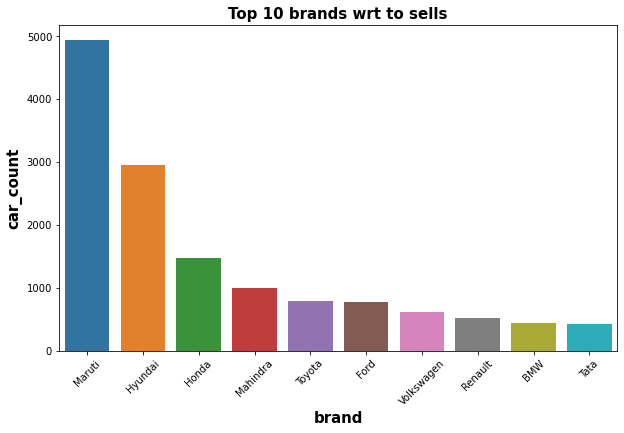

In [13]:
### Top 10 brands wrt sales

plt.figure(figsize=(10,6))
sns.barplot(y= data['brand'].value_counts()[:10],x=data['brand'].value_counts()[:10].index[:10])
plt.xlabel('brand' , fontsize=15,fontweight='bold')
plt.ylabel('car_count' , fontsize=15,fontweight='bold')
plt.title('Top 10 brands wrt to sells',fontsize=15,fontweight='bold')
plt.xticks(rotation=45)
plt.show();

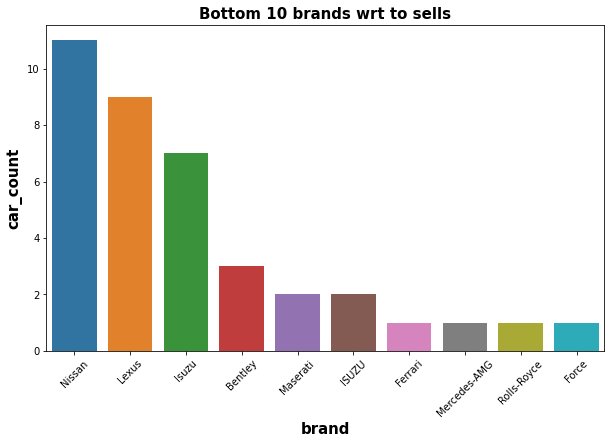

In [14]:
### Bottom 10 brands wrt sales
plt.figure(figsize=(10,6))
sns.barplot(y=data['brand'].value_counts()[-10:] , x= data['brand'].value_counts()[-10:].index[-10:])
plt.xlabel('brand',fontsize=15,fontweight='bold')
plt.ylabel('car_count', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Bottom 10 brands wrt to sells",fontsize=15, fontweight='bold')
plt.show();

In [15]:
data.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

In [16]:
### Top 10 Cars
pd.DataFrame(data.groupby('car_name')['car_name'].count().sort_values(ascending=False)[:10]).rename(columns={'car_name':'car_count'})

car_count
car_name                     
Hyundai i20               898
Maruti Swift Dzire        875
Maruti Swift              774
Maruti Alto               768
Honda City                750
Maruti Wagon R            709
Hyundai Grand             569
Toyota Innova             544
Hyundai Verna             488
Hyundai i10               406

In [17]:
### Bottom 10 Cars
pd.DataFrame(data.groupby('car_name')['car_name'].count().sort_values(ascending=False)[-10:]).rename(columns={'car_name':'car_count'})

car_count
car_name                        
ISUZU MUX                      2
Isuzu MUX                      1
Hyundai Aura                   1
Mercedes-AMG C                 1
Maserati Quattroporte          1
Maserati Ghibli                1
Rolls-Royce Ghost              1
Ferrari GTC4Lusso              1
Force Gurkha                   1
Tata Altroz                    1

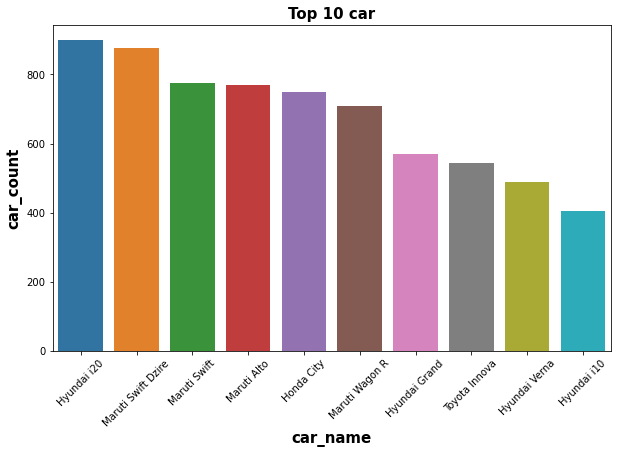

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(y=data['car_name'].value_counts()[:10],x=data['car_name'].value_counts().index[:10])
plt.xlabel('car_name',fontsize=15,fontweight='bold')
plt.ylabel('car_count',fontsize=15,fontweight='bold')
plt.xticks(rotation=45)
plt.title("Top 10 car",fontsize=15,fontweight='bold')
plt.show();

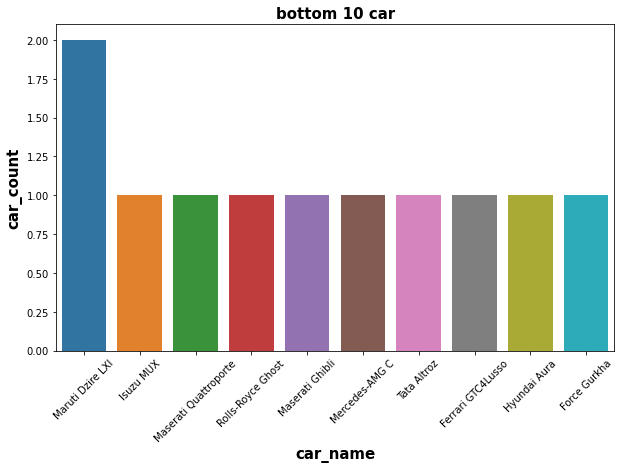

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(y=data['car_name'].value_counts()[-10:] , x= data['car_name'].value_counts().index[-10:])
plt.xlabel('car_name',fontsize=15,fontweight='bold')
plt.ylabel('car_count',fontsize=15,fontweight='bold')
plt.xticks(rotation=45)
plt.title('bottom 10 car',fontsize=15,fontweight='bold')
plt.show();

# <span style='color:blue'> Observation of Top and Bottom selling cars: </span>
    
1.Maruti has most no of sales followed by hyundai and honda.

2.Whereas force, Rolls-royce, ferrari and Mercedes_AMG have least no. of sales.

3.Hyundai i20 is highest selling car followed by Swift dezire and swift.

4.Whereas force Gurkha, Hyundai aura, ferrari GTC4Lusso ,etc are least selling cars.

# <span style='color:red'> 3.2 Brands and Cars wrt Total Selling Price </span>

In [20]:
### Brands wrt Total Selling Price
pd.DataFrame(data.groupby('brand')['selling_price'].sum().sort_values(ascending=False)).rename(columns={'selling_price':'Total selling price'})


Total selling price
brand                             
Maruti                  2402298875
Hyundai                 1701766000
BMW                     1171390000
Toyota                  1082111000
Honda                    911360000
Mercedes-Benz            823437000
Mahindra                 787825000
Ford                     491764000
Audi                     374443000
Volkswagen               316529000
Tata                     288200000
Skoda                    261486000
Renault                  233213000
Land Rover               192344000
Jaguar                   153539000
Porsche                  108385000
Volvo                     74594000
Jeep                      73628000
Kia                       55528000
Datsun                    54488000
Lexus                     47365000
Ferrari                   39500000
Mini                      37105000
MG                        33306000
Bentley                   27800000
Rolls-Royce               24200000
Maserati                  12200000
Nissan                    10509000
Isuzu                      9640000
Mercedes-AMG               5100000
ISUZU                      3795000
Force                       700000

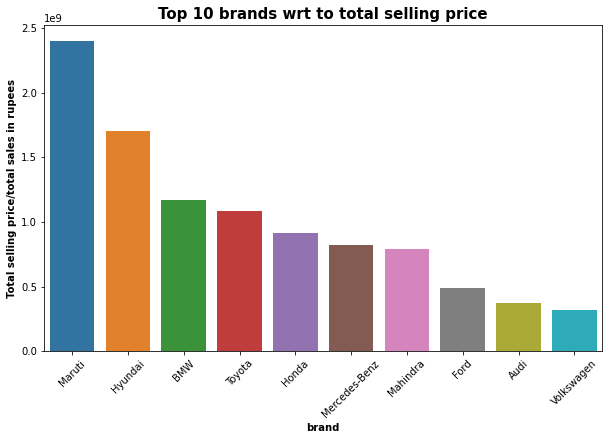

In [21]:
### Top 10 brands wrt to total selling price

plt.figure(figsize=(10,6))
sns.barplot(y=data.groupby('brand')['selling_price'].sum().sort_values(ascending=False)[:10],x= data.groupby('brand')['selling_price'].sum().sort_values(ascending=False).index[:10])
plt.xlabel('brand',fontsize=10,fontweight='bold')
plt.ylabel('Total selling price/total sales in rupees',fontsize=10,fontweight='bold')
plt.xticks(rotation=45)
plt.title("Top 10 brands wrt to total selling price",fontsize=15,fontweight='bold')
plt.show();

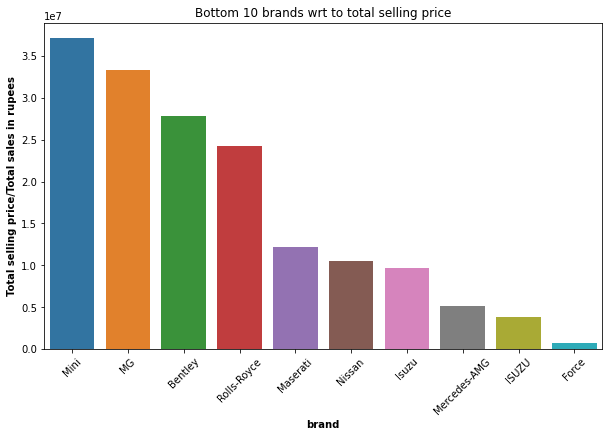

In [22]:
### Bottom 10 brands wrt to total selling price

plt.figure(figsize=(10,6))
sns.barplot(y= data.groupby('brand')['selling_price'].sum().sort_values(ascending=False)[-10:],x=data.groupby('brand')['selling_price'].sum().sort_values(ascending=False).index[-10:])
plt.xlabel('brand',fontsize=10,fontweight='bold')
plt.ylabel('Total selling price/Total sales in rupees', fontsize=10,fontweight='bold')
plt.xticks(rotation=45)
plt.title('Bottom 10 brands wrt to total selling price')
plt.show();

In [23]:
### Top 10 Cars wrt Total Selling Price
pd.DataFrame(data.groupby('car_name')['selling_price'].sum().sort_values(ascending=False)[:10]).rename(columns={'selling_price':'Total selling price'})


Total selling price
car_name                               
Toyota Innova                 639831000
Hyundai i20                   487790000
Honda City                    468565000
Maruti Swift Dzire            459811000
Maruti Swift                  365551000
Toyota Fortuner               364188000
Hyundai Creta                 343551000
BMW 5                         337804000
Mahindra XUV500               329429000
Hyundai Verna                 318210000

In [24]:
### Bottom 10 Cars wrt Total Selling Price
pd.DataFrame(data.groupby('car_name')['selling_price'].sum().sort_values(ascending=False)[-10:]).rename(columns={'selling_price':'Total selling price'})

Total selling price
car_name                             
Honda CR                      4415000
ISUZU MUX                     3795000
Datsun redi-GO                3212000
Isuzu MUX                     2300000
Maruti Dzire ZXI              2200000
Nissan X-Trail                2135000
Hyundai Aura                   900000
Maruti Dzire LXI               885000
Tata Altroz                    730000
Force Gurkha                   700000

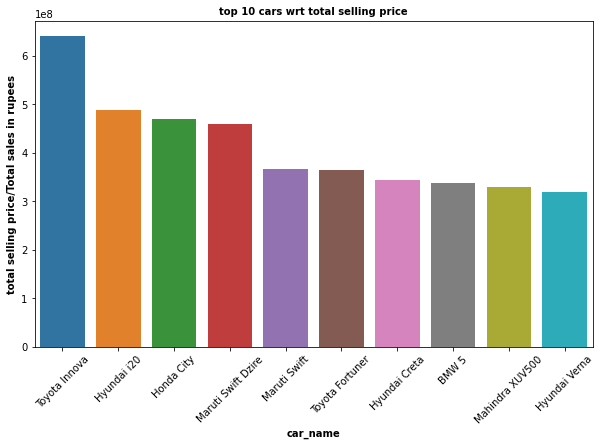

In [25]:
### Top 10 cars wrt total selling price

plt.figure(figsize=(10,6))
sns.barplot(y= data.groupby('car_name')['selling_price'].sum().sort_values(ascending=False)[:10],
            x=data.groupby('car_name')['selling_price'].sum().sort_values(ascending=False).index[:10])
plt.xlabel('car_name', fontsize=10,fontweight='bold') 
plt.ylabel('total selling price/Total sales in rupees',fontsize=10,fontweight='bold')
plt.xticks(rotation=45)
plt.title('top 10 cars wrt total selling price',fontsize=10,fontweight='bold')
plt.show();

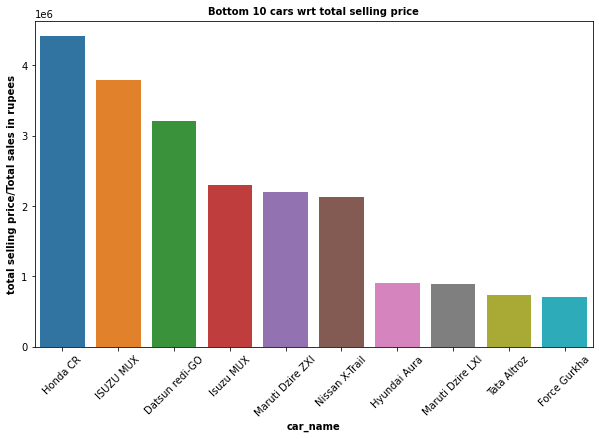

In [26]:
### Bottom 10 cars wrt total selling price

plt.figure(figsize=(10,6))
sns.barplot(y= data.groupby('car_name')['selling_price'].sum().sort_values(ascending=False)[-10:],
            x=data.groupby('car_name')['selling_price'].sum().sort_values(ascending=False).index[-10:])
plt.xlabel('car_name', fontsize=10,fontweight='bold') 
plt.ylabel('total selling price/Total sales in rupees',fontsize=10,fontweight='bold')
plt.xticks(rotation=45)
plt.title('Bottom 10 cars wrt total selling price',fontsize=10,fontweight='bold')
plt.show();

# <span style='color:blue'> Observation of car_name wrt to total selling price/Selling_price:</span>
    
1.Maruti has highest Total amount of sales followed by hyundai and BMW.

2.Whereas force, ISUZU, Mercedes_AMG and Nissan have least Total amount of sales in that order.

3.Toyota Innova has highest total amount of sales followed by Hyundai i20 and Honda City.

4.Whereas force Gurkha, Tata Altroz, Maruti dzire LXI have least total amount of car sales.

# <span style='color:red'> 3.3 Brands and Cars wrt Costliest Cars </span>

In [27]:
### Brands wrt Costliest Car
pd.DataFrame(data.groupby('brand')['selling_price'].max().sort_values(ascending=False)).rename(columns={'selling_price':'Costliest Car Price'})

Costliest Car Price
brand                             
Ferrari                   39500000
Rolls-Royce               24200000
Bentley                   14500000
Mercedes-Benz             13000000
Porsche                   11100000
Land Rover                 9200000
BMW                        8500000
Volvo                      8195000
Lexus                      8000000
Audi                       6800000
Jaguar                     6300000
Maserati                   6200000
Jeep                       5600000
Mercedes-AMG               5100000
Mini                       3875000
Toyota                     3650000
Skoda                      3550000
Kia                        3525000
Ford                       3200000
Honda                      3200000
Mahindra                   2950000
Hyundai                    2600000
Isuzu                      2300000
MG                         2075000
ISUZU                      1900000
Tata                       1750000
Nissan                     1450000
Volkswagen                 1250000
Maruti                     1225000
Renault                    1155000
Force                       700000
Datsun                      650000

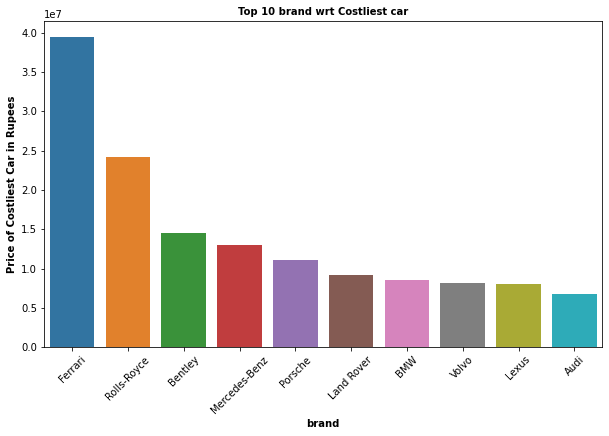

In [28]:
### Top 10 brand wrt Costliest car

plt.figure(figsize=(10,6))
sns.barplot(y=data.groupby('brand')['selling_price'].max().sort_values(ascending=False)[:10],x=data.groupby('brand')['selling_price'].max().sort_values(ascending=False).index[:10])
plt.xlabel('brand', fontsize=10,fontweight='bold')
plt.ylabel('Price of Costliest Car in Rupees',fontsize=10,fontweight='bold' )
plt.xticks(rotation=45)
plt.title('Top 10 brand wrt Costliest car',fontsize=10,fontweight='bold')
plt.show();

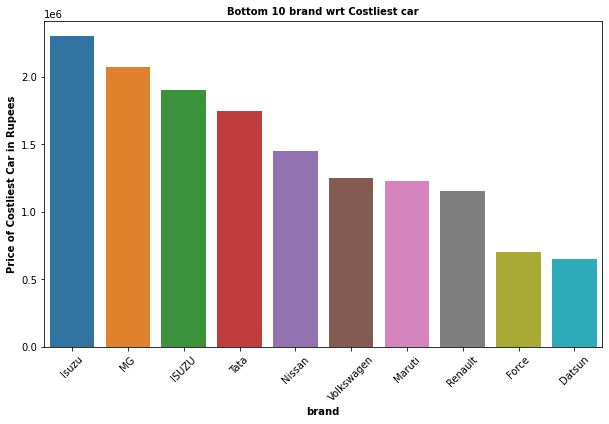

In [29]:
### Bottom 10 brand wrt Costliest car

plt.figure(figsize=(10,6))
sns.barplot(y=data.groupby('brand')['selling_price'].max().sort_values(ascending=False)[-10:],x=data.groupby('brand')['selling_price'].max().sort_values(ascending=False).index[-10:])
plt.xlabel('brand', fontsize=10,fontweight='bold')
plt.ylabel('Price of Costliest Car in Rupees',fontsize=10,fontweight='bold' )
plt.xticks(rotation=45)
plt.title('Bottom 10 brand wrt Costliest car',fontsize=10,fontweight='bold')
plt.show();

In [30]:
### Top 10 Costliest Car
pd.DataFrame(data.groupby('car_name')['selling_price'].max().sort_values(ascending=False)[:10]).rename(columns={'selling_price':'Car price'})

Car price
car_name                        
Ferrari GTC4Lusso       39500000
Rolls-Royce Ghost       24200000
Bentley Continental     14500000
Mercedes-Benz S-Class   13000000
Porsche Cayenne         11100000
Land Rover Rover         9200000
BMW 7                    8500000
BMW Z4                   8250000
Volvo XC                 8195000
BMW X5                   8100000

In [31]:
### Bottom 10 Costliest Car
pd.DataFrame(data.groupby('car_name')['selling_price'].max().sort_values(ascending=False)[-10:]).rename(columns={'selling_price':'Car price'})

Car price
car_name                   
Maruti Wagon R       625000
Maruti Celerio       595000
Maruti S-Presso      550000
Renault KWID         550000
Maruti Dzire LXI     500000
Hyundai i10          500000
Maruti Eeco          490000
Maruti Alto          485000
Datsun redi-GO       435000
Datsun RediGO        425000

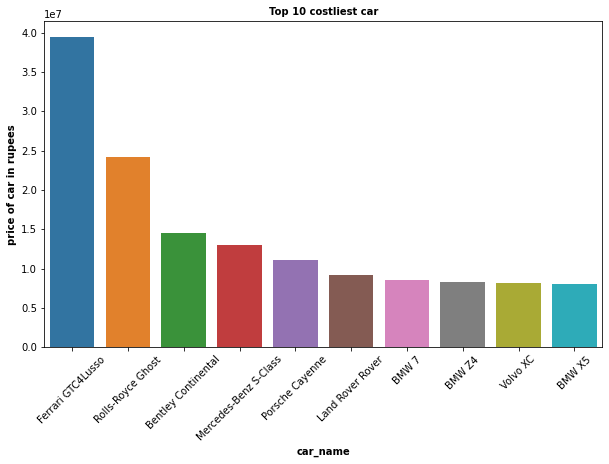

In [32]:
### Top 10 costliest cars
plt.figure(figsize=(10,6))
sns.barplot(y= data.groupby('car_name')['selling_price'].max().sort_values(ascending=False)[:10],x=data.groupby('car_name')['selling_price'].max().sort_values(ascending=False).index[:10])
plt.xlabel('car_name',fontsize=10,fontweight='bold')
plt.ylabel('price of car in rupees',fontsize=10,fontweight='bold')
plt.xticks(rotation=45)
plt.title('Top 10 costliest car',fontsize=10,fontweight='bold')
plt.show();

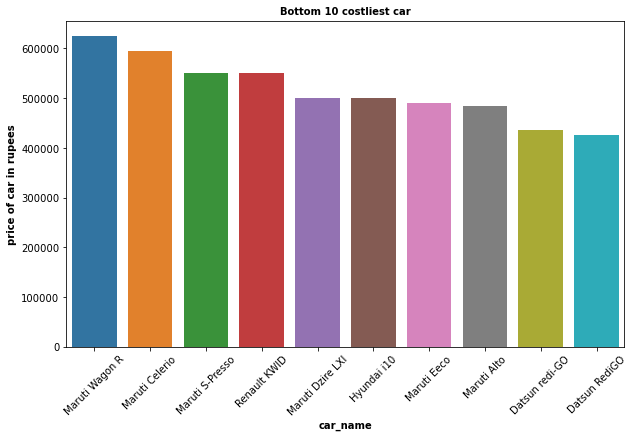

In [33]:
### Bottom 10 costliest cars
plt.figure(figsize=(10,6))
sns.barplot(y= data.groupby('car_name')['selling_price'].max().sort_values(ascending=False)[-10:],x=data.groupby('car_name')['selling_price'].max().sort_values(ascending=False).index[-10:])
plt.xlabel('car_name',fontsize=10,fontweight='bold')
plt.ylabel('price of car in rupees',fontsize=10,fontweight='bold')
plt.xticks(rotation=45)
plt.title('Bottom 10 costliest car',fontsize=10,fontweight='bold')
plt.show();

# <span style='color:blue'> Observation of car wrt to costliest price:</span>
    
1.Ferrari has Costliest car followed by Rolls-Royce and Bentley.

2.Datsun has cheapest car followed by Force and Renault.

3.Ferrari GTC4Lusso is costliest car followed by Rolls-Royce Ghost and bentley Continental.

4.Datsun RediGO is cheapest car followed by Maruti Alto and Maruti Eeco.

# <span style='color:red'> 3.4 Brands and Cars wrt Mileage </span>

In [34]:
### Brand wrt Average Mileage
pd.DataFrame(data.groupby('brand')['mileage'].mean().sort_values(ascending=False)).rename(columns={'mileage':'average mileage'})

average mileage
brand                         
Maruti               22.425520
Renault              22.073586
Datsun               21.215647
Lexus                20.676667
Ford                 19.970335
Honda                19.901463
Maserati             19.820000
Tata                 19.780855
Hyundai              19.590650
Volkswagen           18.690977
Mini                 18.287647
Skoda                17.663904
BMW                  17.450046
Kia                  17.323125
Force                17.000000
Jeep                 16.236585
Nissan               16.151818
Audi                 16.119737
Jaguar               16.085172
Mahindra             15.864314
MG                   15.620526
Volvo                14.860000
ISUZU                13.800000
Mercedes-Benz        13.531054
Porsche              13.515714
Toyota               13.207414
Land Rover           13.038400
Isuzu                12.600000
Mercedes-AMG         11.900000
Rolls-Royce          10.200000
Bentley               8.033333
Ferrari               4.000000

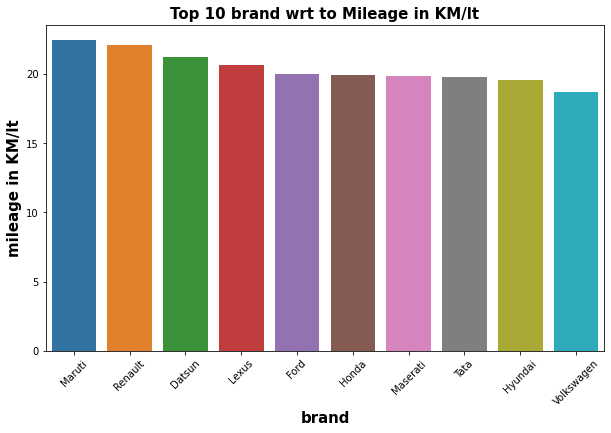

In [35]:
### Top 10 brand wrt Mileage of cars 
plt.figure(figsize=(10,6))
sns.barplot(y=data.groupby('brand')['mileage'].mean().sort_values(ascending=False)[:10],x= data.groupby('brand')['mileage'].mean().sort_values(ascending=False).index[:10])
plt.ylabel('mileage in KM/lt',fontsize=15,fontweight='bold')
plt.xlabel('brand',fontsize=15,fontweight='bold')
plt.xticks(rotation=45)
plt.title('Top 10 brand wrt to Mileage in KM/lt',fontsize=15,fontweight='bold')
plt.show();

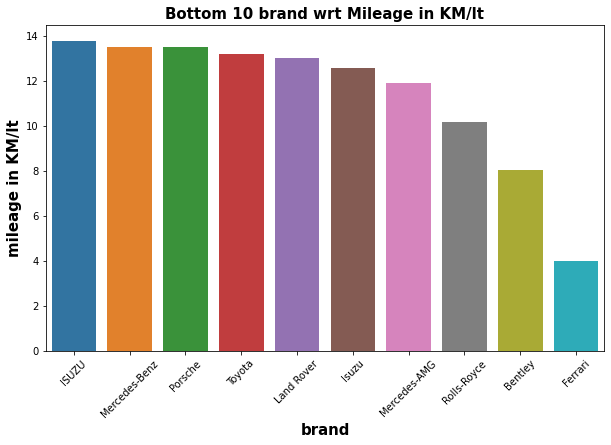

In [36]:
### Bottom 10 brand wrt Mileage of cars
plt.figure(figsize=(10,6))
sns.barplot(y=data.groupby('brand')['mileage'].mean().sort_values(ascending=False)[-10:],
            x=data.groupby('brand')['mileage'].mean().sort_values(ascending=False).index[-10:])
plt.ylabel('mileage in KM/lt', fontsize=15,fontweight='bold')
plt.xlabel('brand',fontsize=15,fontweight='bold')
plt.xticks(rotation=45)
plt.title('Bottom 10 brand wrt Mileage in KM/lt',fontsize=15,fontweight='bold')
plt.show();

In [37]:
### Top 10 car wrt Mileage
pd.DataFrame(data.groupby('car_name')['mileage'].mean().sort_values(ascending=False)[:10]).rename(columns={'mileage':'average mileage'})

average mileage
car_name                         
Tata Tiago              24.617465
Maruti Ciaz             24.304198
Maruti Vitara           24.230519
Renault KWID            24.022308
Maruti Celerio          23.717521
Maruti Dzire VXI        23.512941
Maruti Dzire LXI        23.260000
Maruti Dzire ZXI        23.260000
Ford Aspire             23.025556
Maruti Swift            22.716473

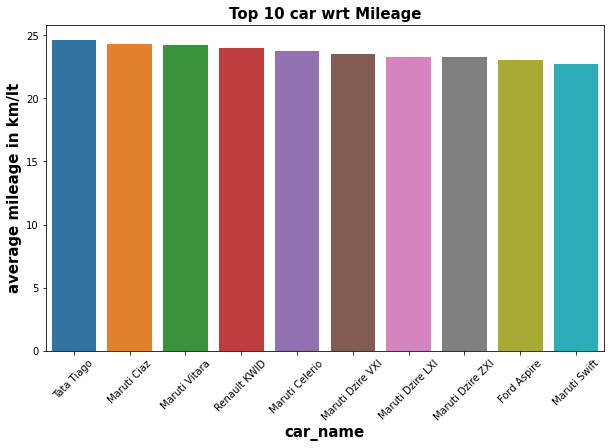

In [38]:
### Top 10 car wrt Mileage
plt.figure(figsize=(10,6))
sns.barplot(y=data.groupby('car_name')['mileage'].mean().sort_values(ascending=False)[:10],x=data.groupby('car_name')['mileage'].mean().sort_values(ascending=False).index[:10])
plt.ylabel('average mileage in km/lt',fontsize=15,fontweight='bold')
plt.xlabel('car_name',fontsize=15,fontweight='bold')
plt.xticks(rotation=45)
plt.title('Top 10 car wrt Mileage',fontsize=15,fontweight='bold')
plt.show();

In [39]:
### Bottom 10 car wrt Mileage
pd.DataFrame(data.groupby('car_name')['mileage'].mean().sort_values(ascending=False)[-10:]).rename(columns={'mileage':'average mileage'})

average mileage
car_name                              
Mercedes-AMG C               11.900000
Mercedes-Benz S-Class        11.681389
Ford Endeavour               11.674048
Porsche Panamera             10.950000
BMW Z4                       10.523333
Mercedes-Benz GLS            10.475000
Rolls-Royce Ghost            10.200000
Jeep Wrangler                 9.500000
Bentley Continental           8.033333
Ferrari GTC4Lusso             4.000000

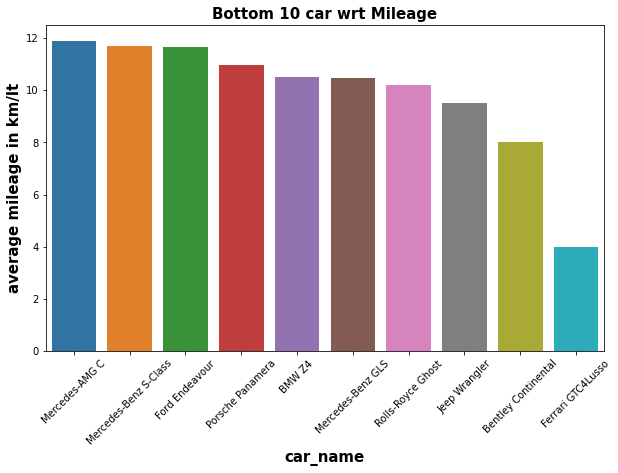

In [40]:
### Bottom 10 car wrt Mileage
plt.figure(figsize=(10,6))
sns.barplot(y=data.groupby('car_name')['mileage'].mean().sort_values(ascending=False)[-10:],x=data.groupby('car_name')['mileage'].mean().sort_values(ascending=False).index[-10:])
plt.ylabel('average mileage in km/lt',fontsize=15,fontweight='bold')
plt.xlabel('car_name',fontsize=15,fontweight='bold')
plt.xticks(rotation=45)
plt.title('Bottom 10 car wrt Mileage',fontsize=15,fontweight='bold')
plt.show();

# <span style='color:blue'> Observation </span>
    
1. Maruti cars have highest average mileage followed by Renault and Datsun.

2.Ferrari cars have least average Mileage followed by Bentely and Rolls Royce.

3.Tata Tiago has highest average mileage followed by Maruti Ciaz and Maruti Vitara.

4.Ferrari GTC4Lusso has least average Mileage followed by bentley Continental and Jeep Wrangler.

# <span style='color:red'> 3.5 Brands and Cars wrt Max Power </span>

In [41]:
### Brands wrt Mean Max Power
pd.DataFrame(data.groupby('brand')['max_power'].mean().sort_values(ascending=False)).rename(columns={'max_power':'mean max_power'})

mean max_power
brand                        
Ferrari            601.000000
Bentley            592.666667
Rolls-Royce        563.000000
Mercedes-AMG       362.070000
Porsche            299.028571
Maserati           270.940000
Lexus              219.912222
Mercedes-Benz      210.780120
Land Rover         210.237400
BMW                207.604266
Jaguar             205.987414
Volvo              205.350000
Audi               181.430158
ISUZU              175.000000
Jeep               172.375610
Mini               151.167059
MG                 150.829474
Isuzu              139.795714
Toyota             135.806793
Kia                130.025000
Skoda              126.194414
Nissan             122.119091
Tata               109.823159
Mahindra           109.177568
Honda              104.340732
Ford                95.931198
Volkswagen          92.629837
Hyundai             92.459993
Force               80.800000
Renault             75.055579
Maruti              74.530935
Datsun              62.645294

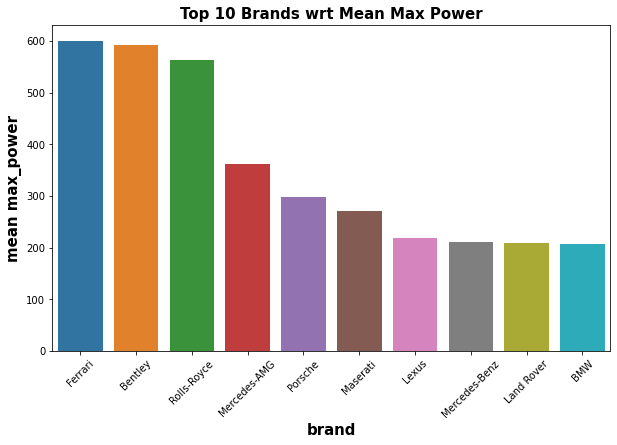

In [42]:
### Top 10 Brands wrt Mean Max Power 
plt.figure(figsize=(10,6))
sns.barplot(y= data.groupby('brand')['max_power'].mean().sort_values(ascending=False)[:10],x= data.groupby('brand')['max_power'].mean().sort_values(ascending=False).index[:10])
plt.ylabel('mean max_power',fontsize=15,fontweight='bold')
plt.xlabel('brand',fontsize=15,fontweight='bold')
plt.xticks(rotation=45)
plt.title('Top 10 Brands wrt Mean Max Power',fontsize=15,fontweight='bold')
plt.show();

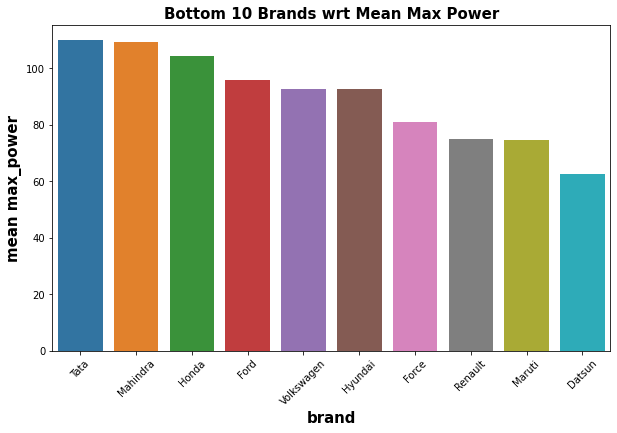

In [43]:
### Bottom 10 Brands wrt Mean Max Power 
plt.figure(figsize=(10,6))
sns.barplot(y= data.groupby('brand')['max_power'].mean().sort_values(ascending=False)[-10:],x= data.groupby('brand')['max_power'].mean().sort_values(ascending=False).index[-10:])
plt.ylabel('mean max_power',fontsize=15,fontweight='bold')
plt.xlabel('brand',fontsize=15,fontweight='bold')
plt.xticks(rotation=45)
plt.title('Bottom 10 Brands wrt Mean Max Power',fontsize=15,fontweight='bold')
plt.show();

In [44]:
### Top 10 Cars wrt Max Power
pd.DataFrame(data.groupby('car_name')['max_power'].max().sort_values(ascending=False)[:10]).rename(columns={'max_power':'max power'})

max power
car_name                         
Bentley Continental        626.00
Ferrari GTC4Lusso          601.00
Rolls-Royce Ghost          563.00
Porsche Cayenne            500.00
Mercedes-Benz S-Class      459.00
BMW 6                      450.00
BMW 7                      402.00
Porsche Panamera           394.30
Mercedes-AMG C             362.07
Mercedes-Benz GL-Class     362.00

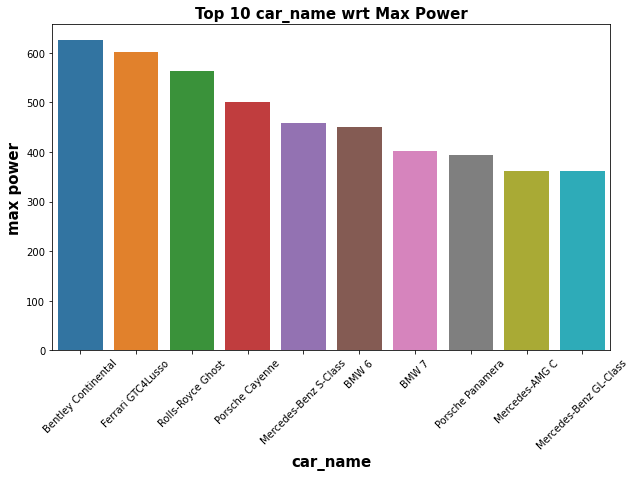

In [45]:
### Top 10 Cars wrt Max Power
plt.figure(figsize=(10,6))
sns.barplot(y= data.groupby('car_name')['max_power'].max().sort_values(ascending=False)[:10],x= data.groupby('car_name')['max_power'].max().sort_values(ascending=False).index[:10])
plt.ylabel('max power',fontsize=15,fontweight='bold')
plt.xlabel('car_name',fontsize=15,fontweight='bold')
plt.xticks(rotation=45)
plt.title('Top 10 car_name wrt Max Power',fontsize=15,fontweight='bold')
plt.show();

In [46]:
### Bottom 10 Cars wrt Max Power
pd.DataFrame(data.groupby('car_name')['max_power'].max().sort_values(ascending=False)[-10:]).rename(columns={'max_power':'max power'})

max power
car_name                  
Datsun GO            76.43
Maruti Eeco          73.00
Renault Triber       72.00
Hyundai Santro       68.07
Datsun RediGO        68.00
Maruti Alto          67.10
Maruti Celerio       67.05
Datsun redi-GO       67.05
Renault KWID         67.00
Maruti S-Presso      67.00

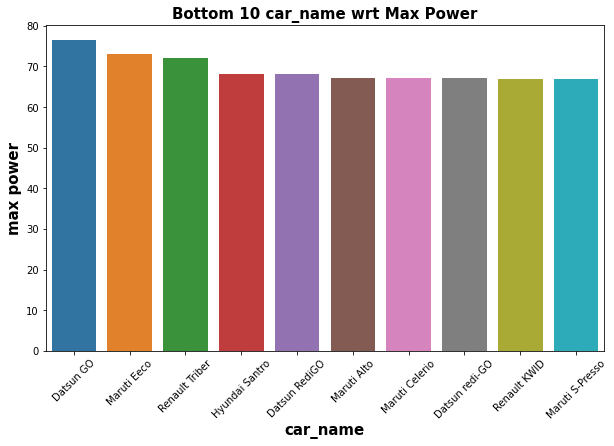

In [47]:
### Bottom 10 Cars wrt Max Power
plt.figure(figsize=(10,6))
sns.barplot(y= data.groupby('car_name')['max_power'].max().sort_values(ascending=False)[-10:],x= data.groupby('car_name')['max_power'].max().sort_values(ascending=False).index[-10:])
plt.ylabel('max power',fontsize=15,fontweight='bold')
plt.xlabel('car_name',fontsize=15,fontweight='bold')
plt.xticks(rotation=45)
plt.title('Bottom 10 car_name wrt Max Power',fontsize=15,fontweight='bold')
plt.show();

# <span style='color:blue'> Observation </span>
1.Ferrari has highest Mean Max Power followed by Bentley and Rolls-Royce.

2.Datsun has least Mean Max Power followed by Maruti and Renault.

3.Bentley Continental has highest Max Power followed by Ferrari GTC4lusso and Rolls-Royce Ghost.

4.Maruti S-Presso least  Max Power followed by Renault KWID and Datsun RediGo.

# <span style='color:red'> 3.6 Brands and Cars wrt Km Driven </span>

In [48]:
### Brands wrt Mean KM Driven
pd.DataFrame(data.groupby('brand')['km_driven'].mean().sort_values(ascending=False)).rename(columns={'km_driven':' mean km_driven'})

mean km_driven
brand                         
Toyota            91840.925222
Mahindra          73075.585586
Isuzu             69876.000000
Land Rover        65874.760000
Skoda             64784.492492
Volkswagen        62849.574919
Volvo             61232.300000
Force             60000.000000
Mercedes-Benz     59471.605422
Audi              58600.231579
Porsche           58356.952381
Ford              58324.350515
ISUZU             56014.500000
Honda             53525.912602
Maruti            51386.572268
BMW               51094.483945
Hyundai           50346.743225
Renault           47803.174573
Tata              47466.076010
Jaguar            44499.103448
Nissan            37853.363636
Jeep              33401.365854
Datsun            33003.576471
Mini              32210.705882
Lexus             28210.444444
Bentley           25500.000000
Mercedes-AMG      24000.000000
Maserati          12250.000000
MG                11538.684211
Kia                9255.437500
Rolls-Royce        5000.000000
Ferrari            3800.000000

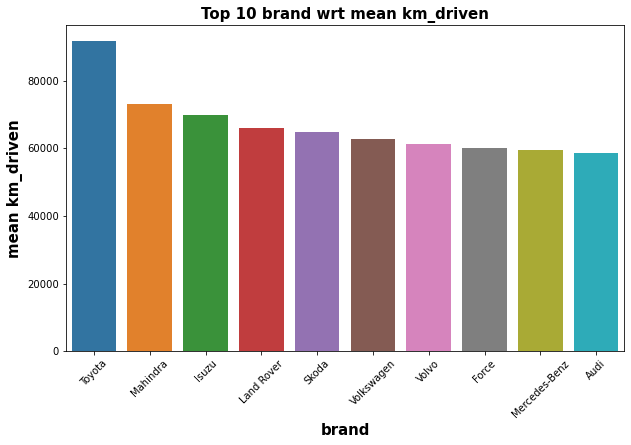

In [49]:
### Top 10 Brands wrt Mean Km Driven
plt.figure(figsize=(10,6))
sns.barplot(y= data.groupby('brand')['km_driven'].mean().sort_values(ascending=False)[:10],x= data.groupby('brand')['km_driven'].mean().sort_values(ascending=False).index[:10])
plt.ylabel('mean km_driven',fontsize=15,fontweight='bold')
plt.xlabel('brand',fontsize=15,fontweight='bold')
plt.xticks(rotation=45)
plt.title('Top 10 brand wrt mean km_driven',fontsize=15,fontweight='bold')
plt.show();

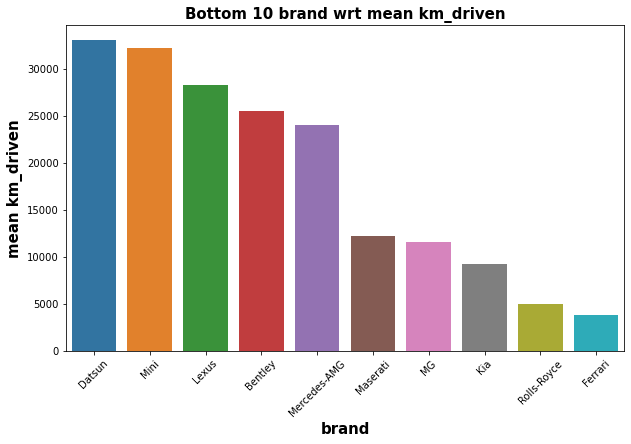

In [50]:
### Bottom 10 Brands wrt Mean Km Driven
plt.figure(figsize=(10,6))
sns.barplot(y= data.groupby('brand')['km_driven'].mean().sort_values(ascending=False)[-10:],x= data.groupby('brand')['km_driven'].mean().sort_values(ascending=False).index[-10:])
plt.ylabel('mean km_driven',fontsize=15,fontweight='bold')
plt.xlabel('brand',fontsize=15,fontweight='bold')
plt.xticks(rotation=45)
plt.title('Bottom 10 brand wrt mean km_driven',fontsize=15,fontweight='bold')
plt.show();

In [51]:
### Top 10 car wrt max Km Driven
pd.DataFrame(data.groupby('car_name')['km_driven'].max().sort_values(ascending=False)[:10]).rename(columns={'km_driven':' max km_driven'})

max km_driven
car_name                             
Mahindra XUV500               3800000
Mercedes-Benz E-Class         1325000
Toyota Innova                  950000
Renault Duster                 850000
Volkswagen Vento               830000
Hyundai Creta                  825000
Volkswagen Polo                820000
Ford Ecosport                  720000
Skoda Rapid                    675000
Toyota Fortuner                590000

In [52]:
### Bottom 10 car wrt max Km Driven
pd.DataFrame(data.groupby('car_name')['km_driven'].max().sort_values(ascending=False)[-10:]).rename(columns={'km_driven':' max km_driven'})

max km_driven
car_name                             
Maruti XL6                      23000
Maserati Ghibli                 15000
Kia Carnival                    14000
BMW X4                          14000
Maruti S-Presso                 12000
Maserati Quattroporte            9500
Rolls-Royce Ghost                5000
Hyundai Aura                     4500
Tata Altroz                      3800
Ferrari GTC4Lusso                3800

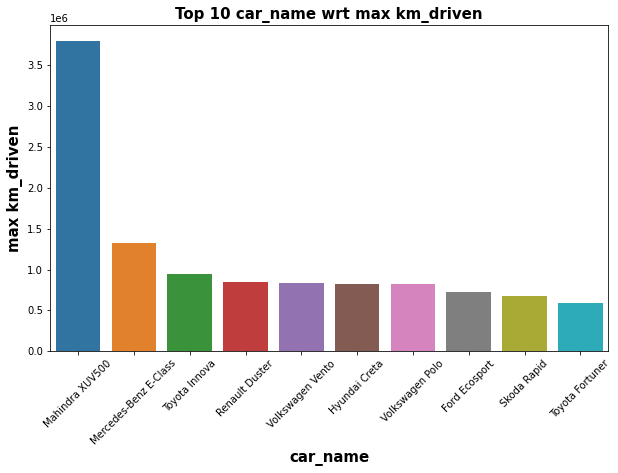

In [53]:
### Top 10 cars wrt Max Km Driven
plt.figure(figsize=(10,6))
sns.barplot(y= data.groupby('car_name')['km_driven'].max().sort_values(ascending=False)[:10],x= data.groupby('car_name')['km_driven'].max().sort_values(ascending=False).index[:10])
plt.ylabel('max km_driven',fontsize=15,fontweight='bold')
plt.xlabel('car_name',fontsize=15,fontweight='bold')
plt.xticks(rotation=45)
plt.title('Top 10 car_name wrt max km_driven',fontsize=15,fontweight='bold')
plt.show();

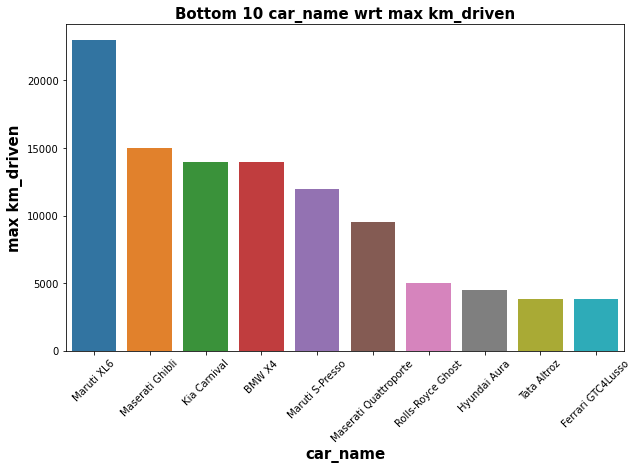

In [54]:
### Bottom 10 cars wrt Max Km Driven
plt.figure(figsize=(10,6))
sns.barplot(y= data.groupby('car_name')['km_driven'].max().sort_values(ascending=False)[-10:],x= data.groupby('car_name')['km_driven'].max().sort_values(ascending=False).index[-10:])
plt.ylabel('max km_driven',fontsize=15,fontweight='bold')
plt.xlabel('car_name',fontsize=15,fontweight='bold')
plt.xticks(rotation=45)
plt.title('Bottom 10 car_name wrt max km_driven',fontsize=15,fontweight='bold')
plt.show();

# <span style='color:blue'> Observation </span>

1.Toyota cars have highest Mean KM Driven followed by Mahindra and isuzu.

2.Ferrari cars have least Mean KM Driven followed by Rolls-Royce and Kia.

3.Mahindra XUV500 has highest max KM Driven followed by Mercedes-Benz E-class and Toyota Innova.

4.Ferrari GTC4lusso has least max KM Driven followed by Tata Altroz and Hyundai Aura.

# <span style='color:red'>3.7 KM Driven and Seller Type vs Selling Price </span>

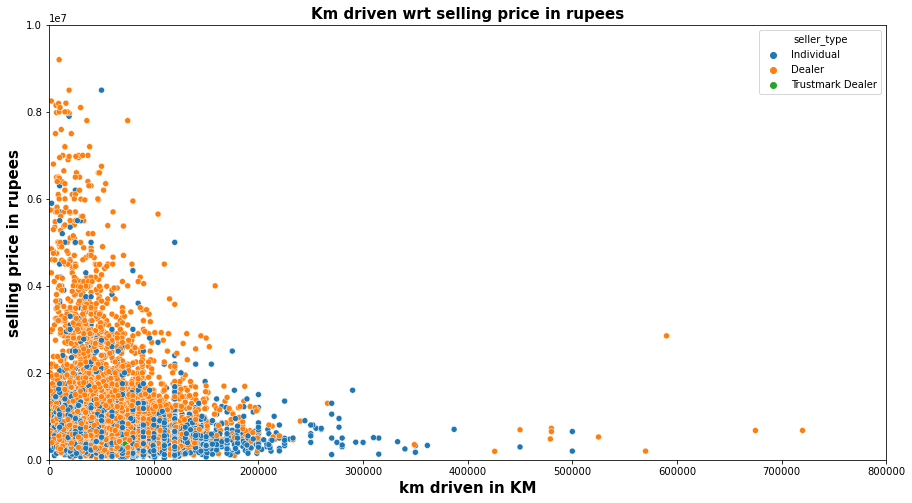

In [55]:
### Km driven wrt selling price
plt.figure(figsize=(15,8))
sns.scatterplot(y=data['selling_price'],x=data['km_driven'],hue=data['seller_type'])
plt.ylabel('selling price in rupees', fontsize=15,fontweight='bold')
plt.xlabel('km driven in KM', fontsize=15,fontweight='bold')
plt.xlim(0,800000)
plt.ylim(0,10000000)
plt.title('Km driven wrt selling price in rupees', fontsize=15,fontweight='bold')
plt.show();

# <span style='color:blue'> Observation </span>

1.It is difficult to sell car if Km Driven is greater than 200K.

2.As the Km driven increases the the Selling price of cars Decreases.

3.It is easy to sell cars at higher price if it is sold by a dealer.

# <span style='color:red'> 3.8 KM Driven and transmission_type vs Selling Price </span>

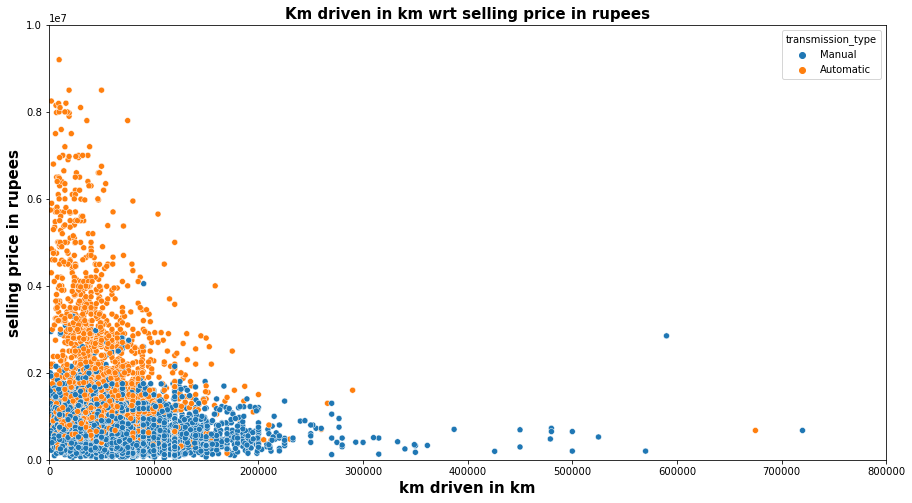

In [56]:
### Km driven wrt selling price
plt.figure(figsize=(15,8))
sns.scatterplot(y=data['selling_price'],x=data['km_driven'],hue=data['transmission_type'])
plt.ylabel('selling price in rupees', fontsize=15,fontweight='bold')
plt.xlabel('km driven in km',fontsize=15,fontweight='bold')
plt.xlim(0,800000)
plt.ylim(0,10000000)
plt.title('Km driven in km wrt selling price in rupees', fontsize=15,fontweight='bold')
plt.show();

# <span style='color:blue'> Observation </span>

1.It is difficult to sell car if Km Driven is greater than 200K.

2.As the Km driven increases the the Selling price of cars Decreases.

3.Automatic Transmission cars sell at higher rate than manual Transmission cars.

# <span style='color:red'> 3.9 KM Driven and fuel_type vs Selling Price </span>

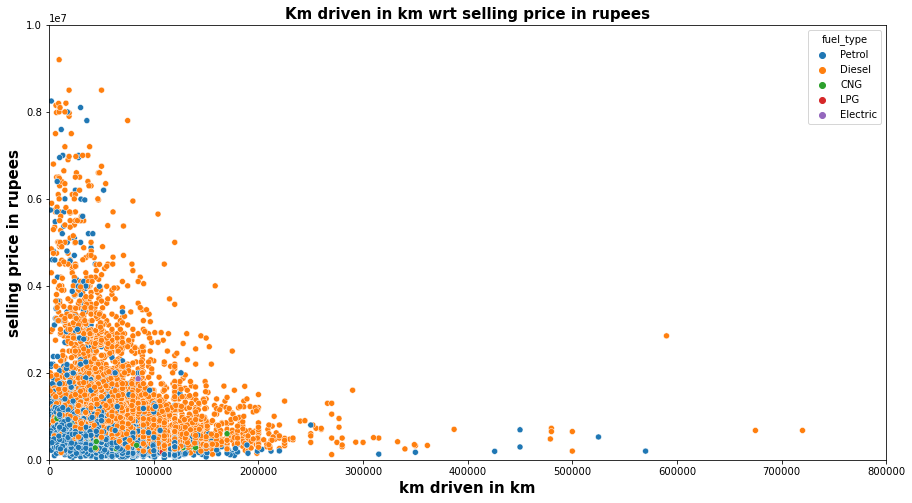

In [57]:
### Km driven wrt selling price
plt.figure(figsize=(15,8))
sns.scatterplot(y=data['selling_price'],x=data['km_driven'],hue=data['fuel_type'])
plt.ylabel('selling price in rupees', fontsize=15,fontweight='bold')
plt.xlabel('km driven in km',fontsize=15,fontweight='bold')
plt.xlim(0,800000)
plt.ylim(0,10000000)
plt.title('Km driven in km wrt selling price in rupees', fontsize=15,fontweight='bold')
plt.show();

# <span style='color:blue'> Observation </span>

1.It is difficult to sell car if Km Driven is greater than 200K.

2.As the Km driven increases the the Selling price of cars Decreases.

3.Majority of cars are either diesel or petrol.

# <span style='color:red'> 3.10 KM Driven and seats vs Selling Price </span>

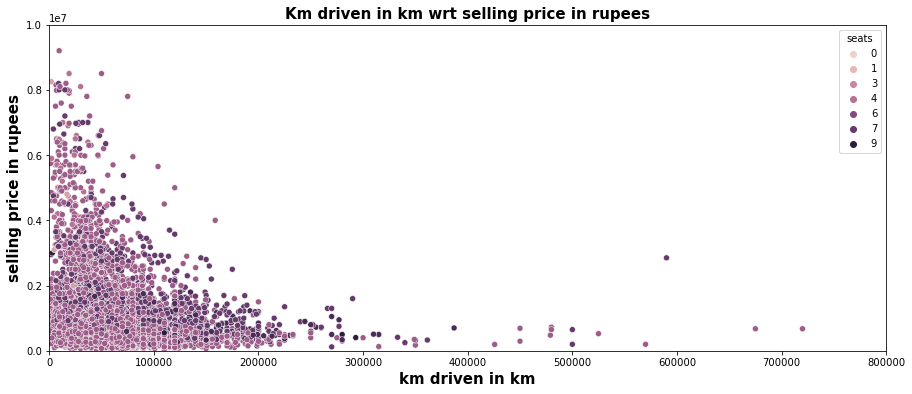

In [58]:
### Km driven wrt selling price
plt.figure(figsize=(15,6))
sns.scatterplot(y=data['selling_price'],x=data['km_driven'],hue=data['seats'])
plt.ylabel('selling price in rupees', fontsize=15,fontweight='bold')
plt.xlabel('km driven in km',fontsize=15,fontweight='bold')
plt.xlim(0,800000)
plt.ylim(0,10000000)
plt.title('Km driven in km wrt selling price in rupees', fontsize=15,fontweight='bold')
plt.show();

# <span style='color:blue'> Observation </span>

1.It is difficult to sell car if Km Driven is greater than 20K.

2.As the Km driven increases the the Selling price of cars Decreases.

3.Market is dominated by 3, 4 and 6 seater cars.

4.As no. of seats decreases the selling price of cars increases.

# <span style='color:red'> 3.11 Numerical features and categorical features vs Selling Price </span>

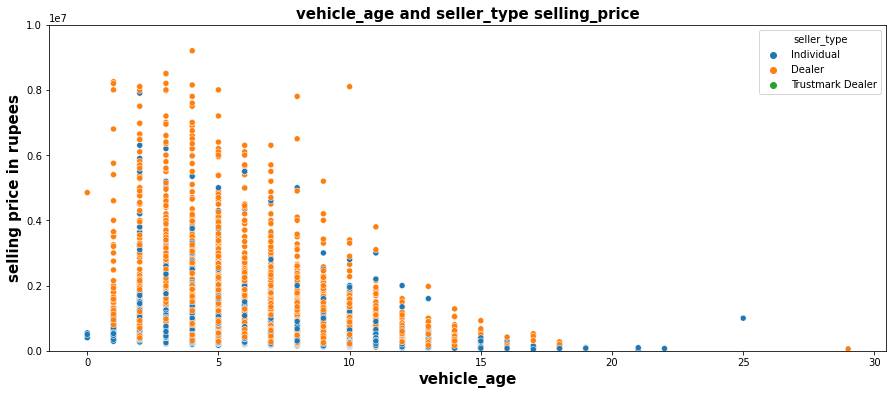

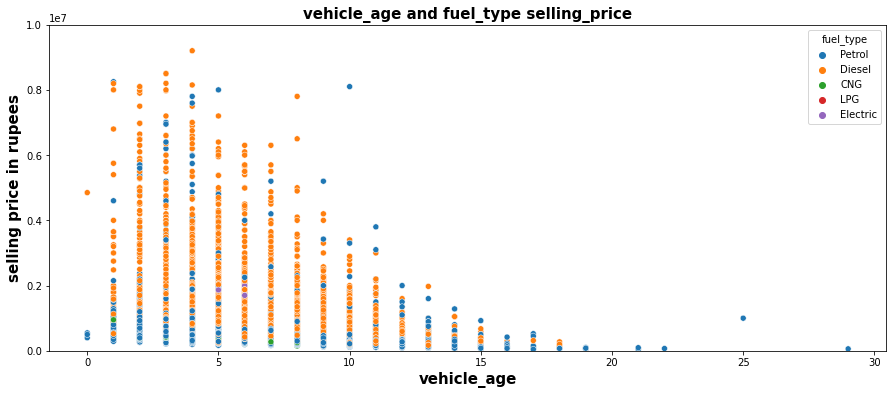

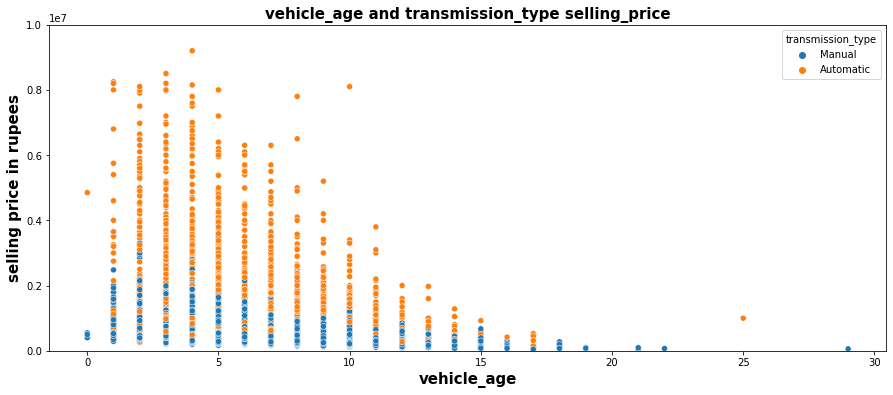

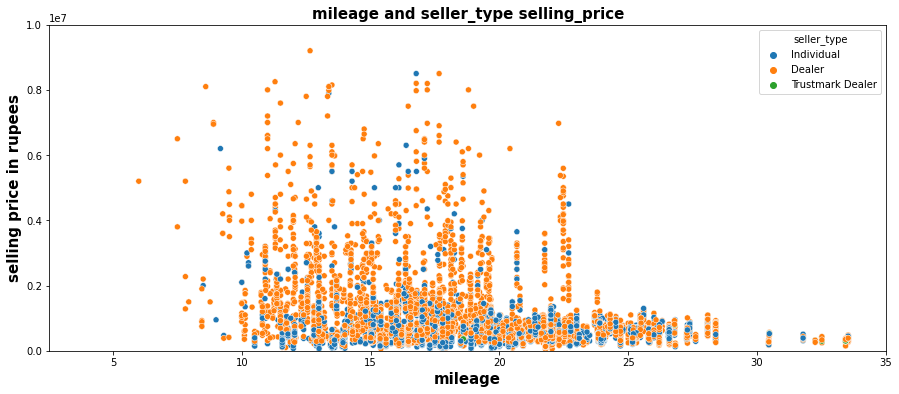

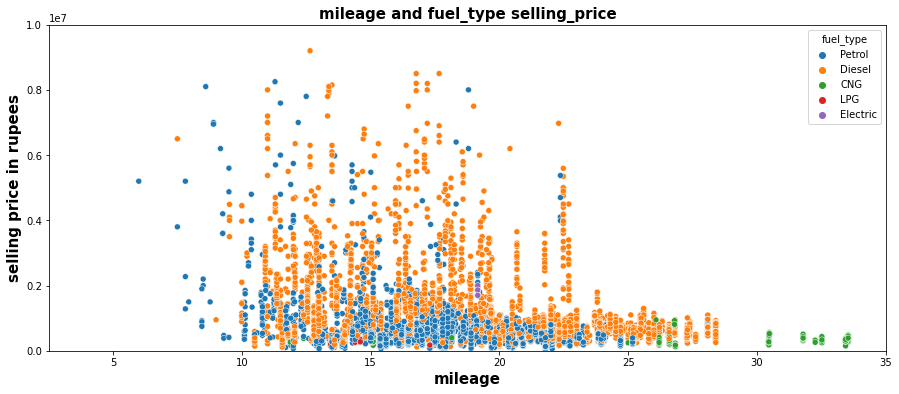

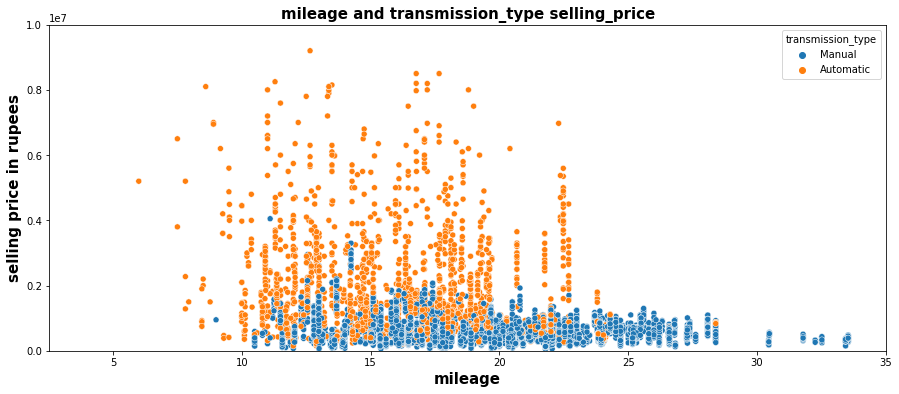

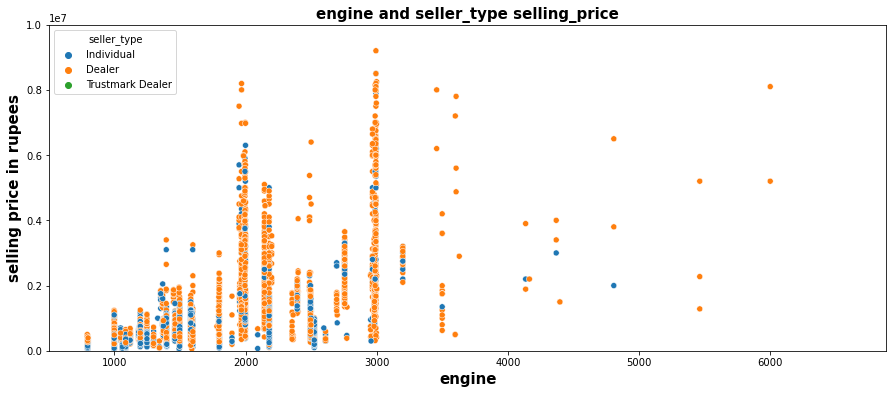

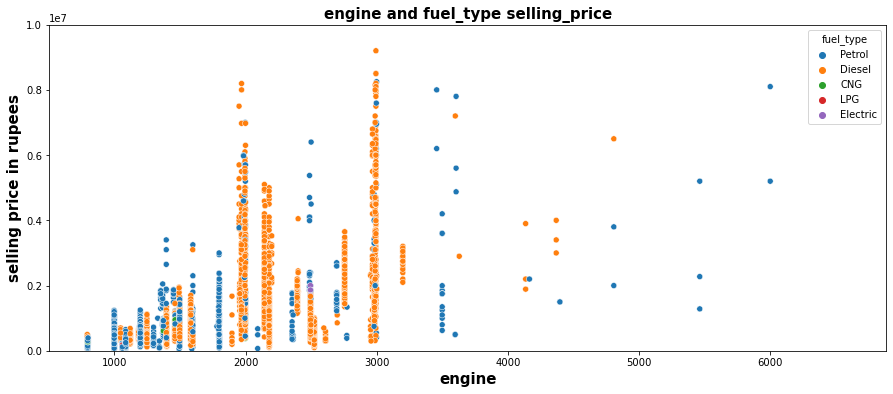

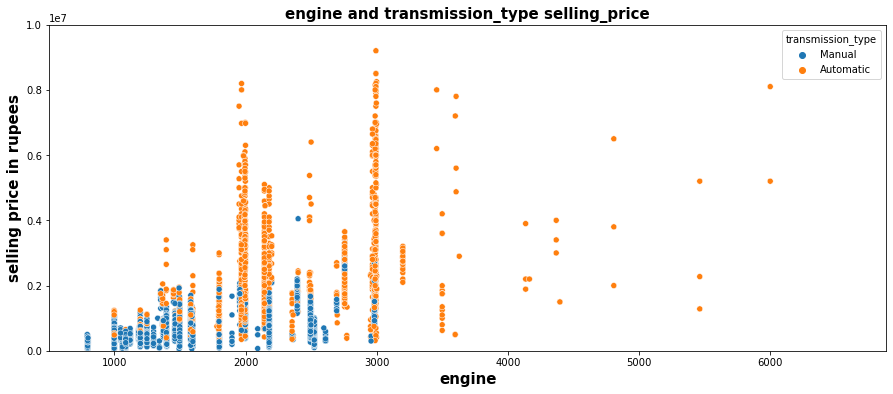

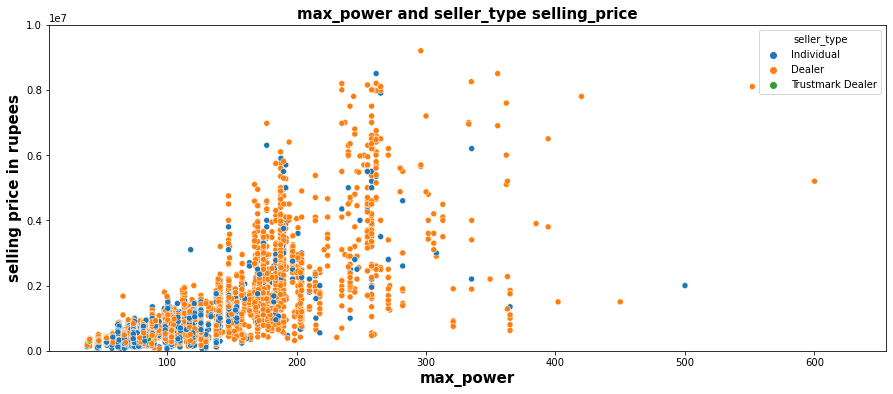

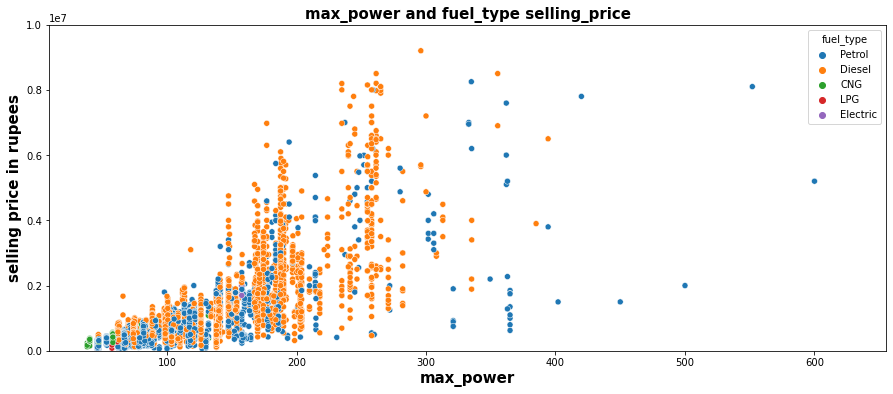

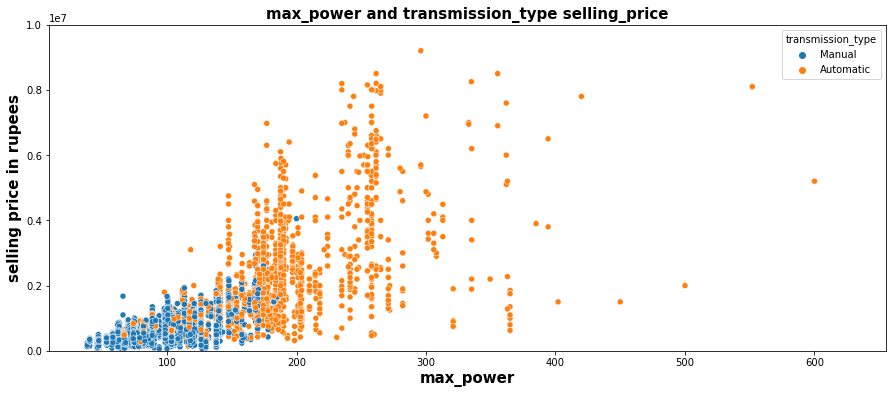

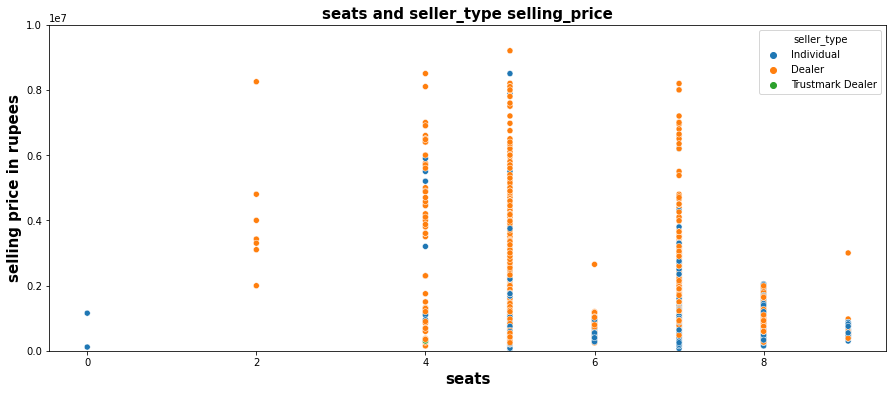

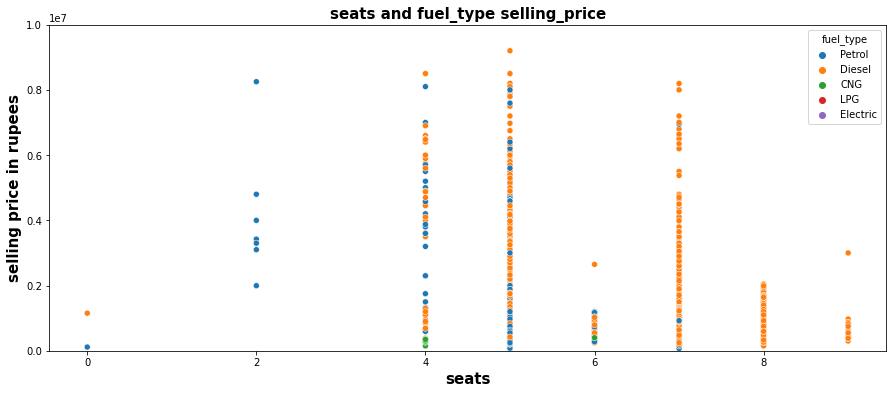

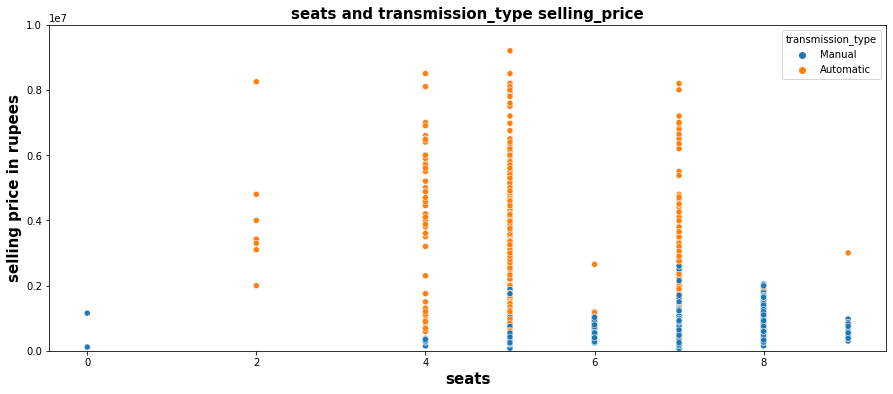

In [59]:
for i in [feature for feature in Numerical_features if feature not in ['selling_price','km_driven']]:
    for j in ['seller_type','fuel_type', 'transmission_type']:
        plt.figure(figsize=(15,6))
        sns.scatterplot(y=data['selling_price'],x=data[i],hue=data[j])
        plt.ylabel('selling price in rupees',fontsize=15,fontweight='bold')
        plt.xlabel('{}'.format(i),fontsize=15,fontweight='bold')
        plt.ylim(0,10000000)
        plt.title('{} and {} selling_price'.format(i,j),fontsize=15,fontweight='bold')
        plt.show();

# <span style='color:blue'> Observation </span>

1.As the vehicle age increase the selling price of vehicle decreases.

2.Dealers are able to sell the cars at higher price than individual owners.

3.Between 1 to 7 vehicle age seller has better chance to get a good price of car.

4.On an average disesl cars are more in demand than petrol car and they sell for higher price.

5.Majority of cars are either diesel or petrol.

6.Automatic transmission cars recieve higher selling price than manual transmission cars.

7.Majority of cars have mileage between 10 to 26 Km/Lt.

8.Cars having mileage between 10 to 20 may get higher selling price offer.

9.It is evident that CNG cars have more mileage than petrol and diesel.

10.Manual transmission cars have more Mileage in comparision to Automatic transmiossion cars.

11.Engine with 1000 to 3000 bhp get more buyer attention.

12.As the max power increases the selling price of cars also increases.

13.Majority of high power cars is sold by dealers.

14.Diesel cars have more power in comparision to Petrol cars.

15.Cars with high power generally comes with automatic transmission.

16.Majority of cars have 4,5 and 7 seats.

17.More than 6 seater car is usually diesel car.

# <span style='color:red'> 3.12 Fuel Type analysis </span>

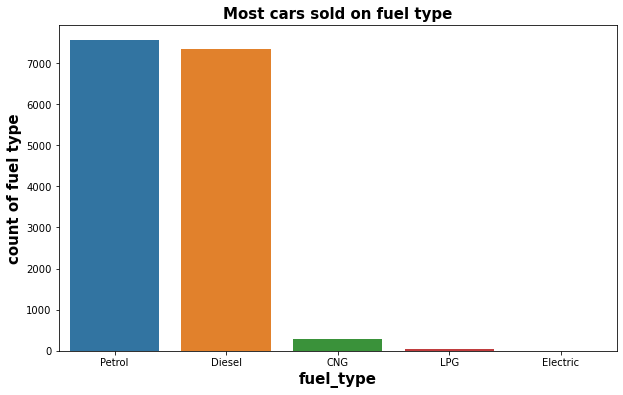

In [60]:
### most cars sold on fuel type
plt.figure(figsize=(10,6))
sns.countplot(x=data['fuel_type'])
plt.ylabel('count of fuel type',fontsize=15,fontweight='bold')
plt.xlabel('fuel_type',fontsize=15,fontweight='bold')
plt.title('Most cars sold on fuel type',fontsize=15,fontweight='bold')
plt.show();

# <span style='color:blue'> Observation </span>

1.Diesel cars have highest total sales followed by petrol.

2.The combined total sales of CNG, LPG and Electric is negligible as compared to Diesel and Petrol.


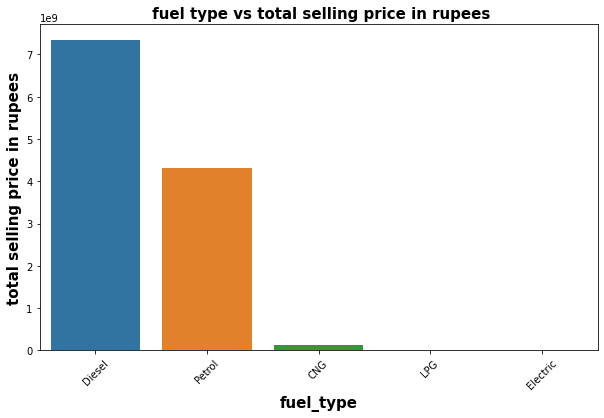

In [63]:
### fuel type vs total selling price
plt.figure(figsize=(10,6))
sns.barplot(y=data.groupby('fuel_type')['selling_price'].sum().sort_values(ascending=False),x=data.groupby('fuel_type')['selling_price'].sum().sort_values(ascending=False).index)
plt.xlabel('fuel_type',fontsize=15,fontweight='bold')
plt.ylabel('total selling price in rupees',fontsize=15,fontweight='bold')
plt.xticks(rotation=45)
plt.title(' fuel type vs total selling price in rupees',fontsize=15,fontweight='bold')
plt.show();

# <span style='color:blue'> Observation </span>

1.Diesel cars have highest total sales followed by petrol.

2.The combined total sales of CNG, LPG and Electric is negligible as compared to Diesel and Petrol.

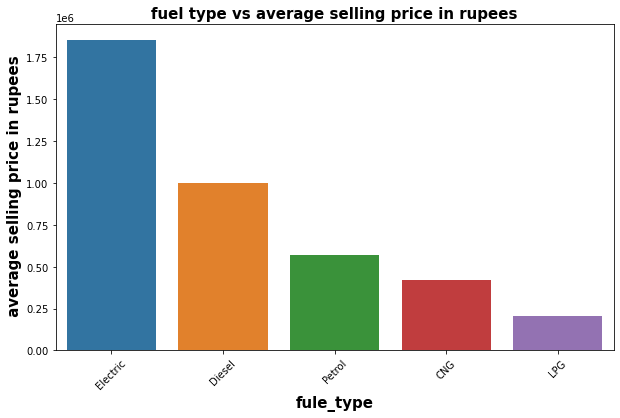

In [65]:
### fuel type vs average selling price
plt.figure(figsize=(10,6))
sns.barplot(y= data.groupby('fuel_type')['selling_price'].mean().sort_values(ascending=False),x=data.groupby('fuel_type')['selling_price'].mean().sort_values(ascending=False).index)
plt.ylabel(' average selling price in rupees',fontsize=15,fontweight='bold')
plt.xlabel('fule_type',fontsize=15,fontweight='bold')
plt.xticks(rotation=45)
plt.title('fuel type vs average selling price in rupees',fontsize=15,fontweight='bold')
plt.show();

# <span style='color:blue'> Observation </span>

1.Electric cars have highest average selling price followed by Diesel and Petrol.

2.LPG has least average selling price.

3.Electric vehicles are twice costlier than diesel car and thrice costlier than petrol cars.

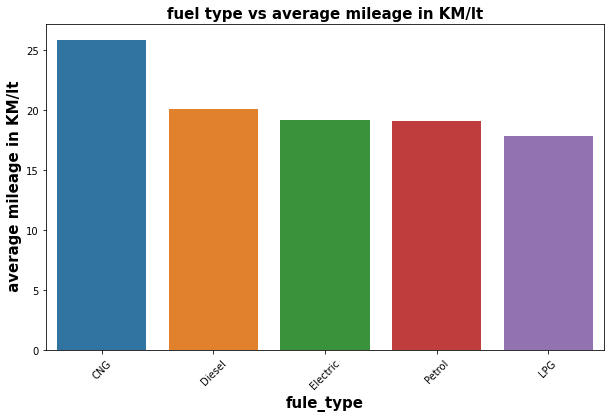

In [66]:
### Fuel Type vs Average Mileage
plt.figure(figsize=(10,6))
sns.barplot(y= data.groupby('fuel_type')['mileage'].mean().sort_values(ascending=False),x=data.groupby('fuel_type')['mileage'].mean().sort_values(ascending=False).index)
plt.ylabel(' average mileage in KM/lt',fontsize=15,fontweight='bold')
plt.xlabel('fule_type',fontsize=15,fontweight='bold')
plt.xticks(rotation=45)
plt.title('fuel type vs average mileage in KM/lt',fontsize=15,fontweight='bold')
plt.show();

# <span style='color:blue'> Observation </span>

1.CNG cars have highest average Mileage followed by diesel, petrol and electric cars.

2.LPG has least average Mileage.

# <span style='color:red'> 3.13 Vehicle age vs Selling Price </span>

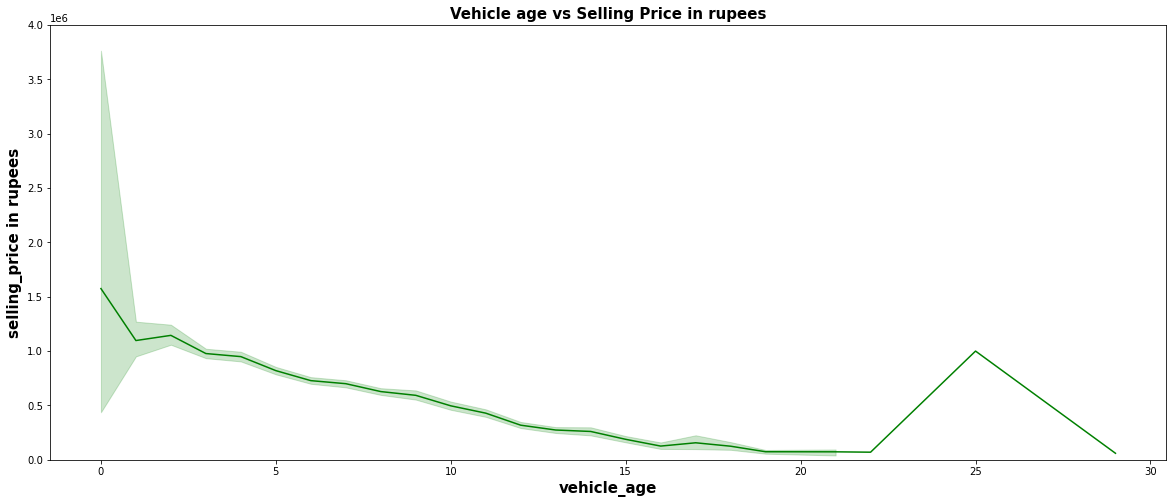

In [71]:
plt.figure(figsize=(20,8))
sns.lineplot(y=data['selling_price'],x=data['vehicle_age'],color='green')
plt.ylabel('selling_price in rupees',fontsize=15,fontweight='bold')
plt.xlabel('vehicle_age',fontsize=15,fontweight='bold')
plt.title('Vehicle age vs Selling Price in rupees',fontsize=15,fontweight='bold')
plt.ylim(0,4000000)
plt.show();

# <span style='color:blue'> Observation </span>

1.As the vehicle age increases the selling price of vehicles decreases.

2.The exception is for cars having age between 22 to 25 years.

# <span style='color:red'>  3.14 Vehicle age vs Mileage </span>


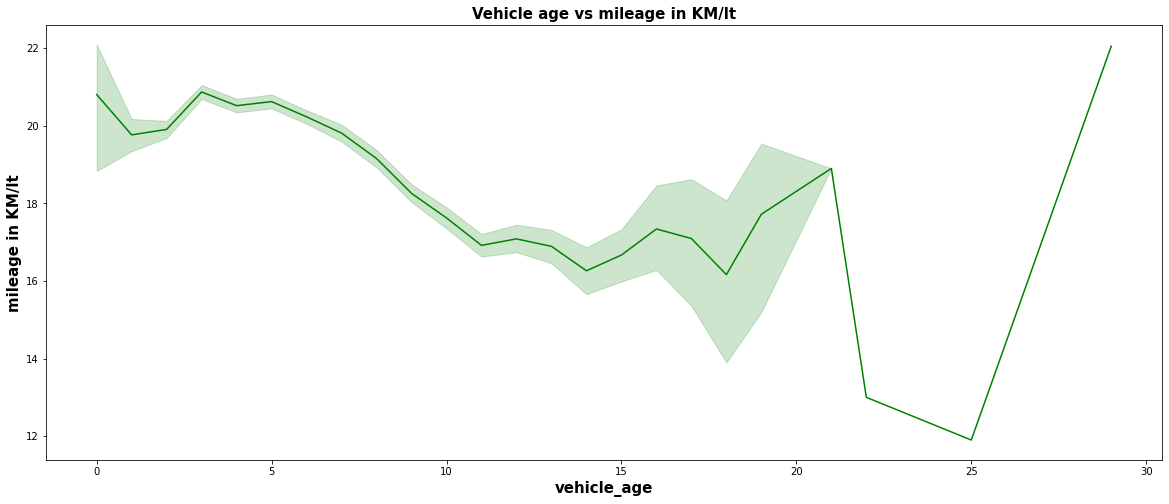

In [72]:
plt.figure(figsize=(20,8))
sns.lineplot(y=data['mileage'],x=data['vehicle_age'],color='green')
plt.ylabel('mileage in KM/lt',fontsize=15,fontweight='bold')
plt.xlabel('vehicle_age',fontsize=15,fontweight='bold')
plt.title('Vehicle age vs mileage in KM/lt',fontsize=15,fontweight='bold')
plt.show();

# <span style='color:blue'> Observation </span>

1.As the vehicle age increases the Average mileage decreases.

# <span style='color:red'> 3.15 Distribution of Numerical Features </span>

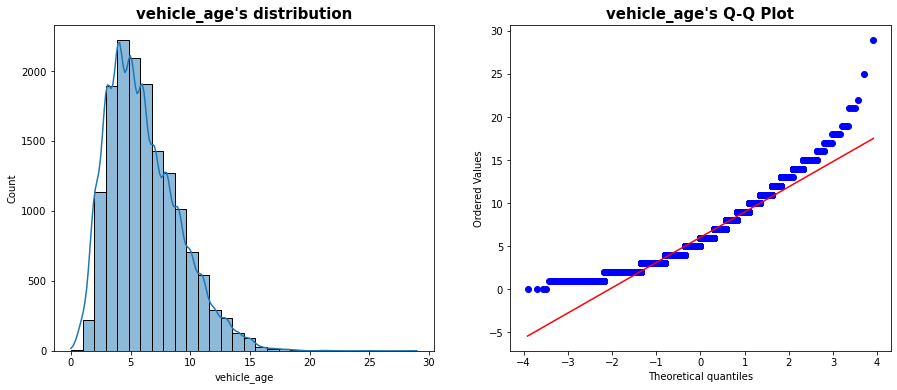

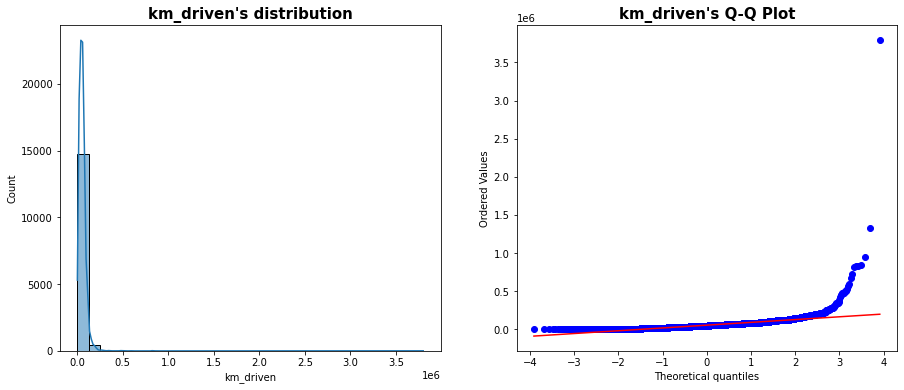

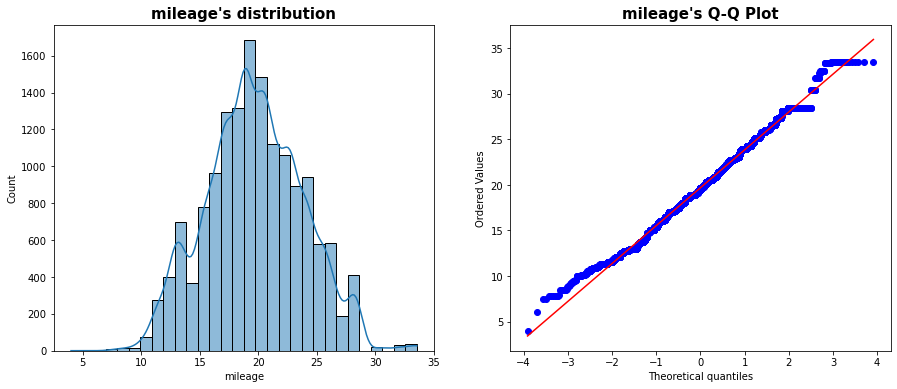

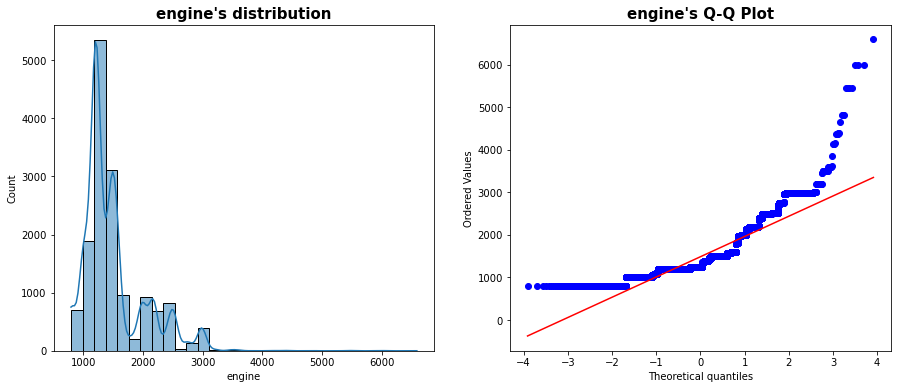

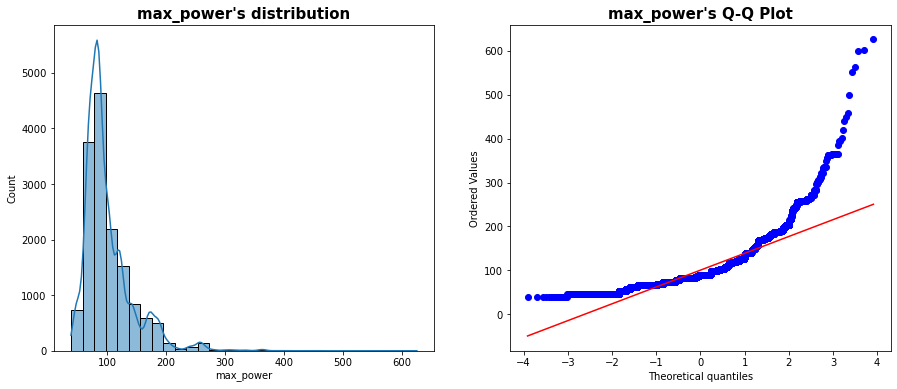

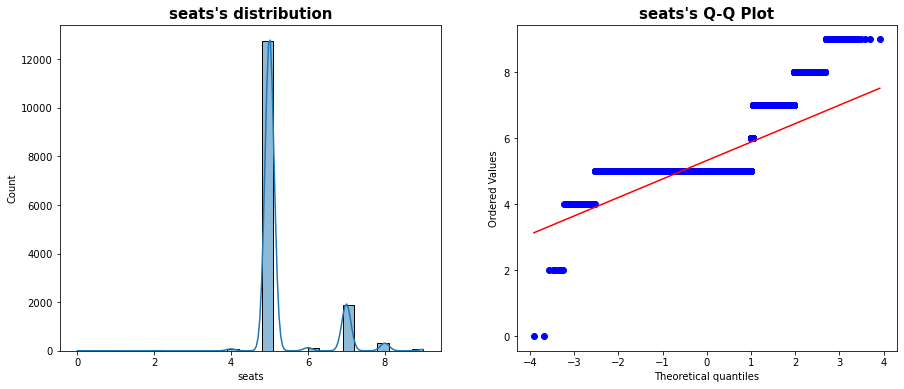

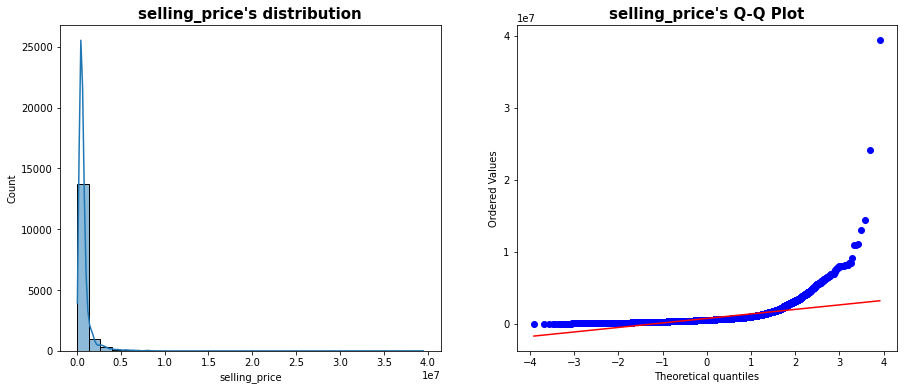

In [80]:
### Checking distribution of numerical features
for feature in Numerical_features:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.histplot(data=data, x=feature, kde=True, bins=30)
    plt.title("{}'s distribution".format(feature),fontweight="bold", fontsize=15)
    
    plt.subplot(122)
    stats.probplot(data[feature], dist='norm', plot=plt)
    plt.title("{}'s Q-Q Plot".format(feature),fontweight="bold", fontsize=15)
    plt.show();

# <span style='color:blue'> Observation </span>

1.Vehicle age, Km Driven, Engine, max_power and selling price have right skewed distribution.

2.Mileage has close to normal distribution just a little bit right skewness is present.

3.Seat is a discreate feature.

# <span style='color:red'> 3.16 Outliers in Numerical Features </span>

In [92]:
Numerical_features= [feature for feature in data.columns if data[feature].dtype !='O']
print('{}'.format(Numerical_features))

['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']


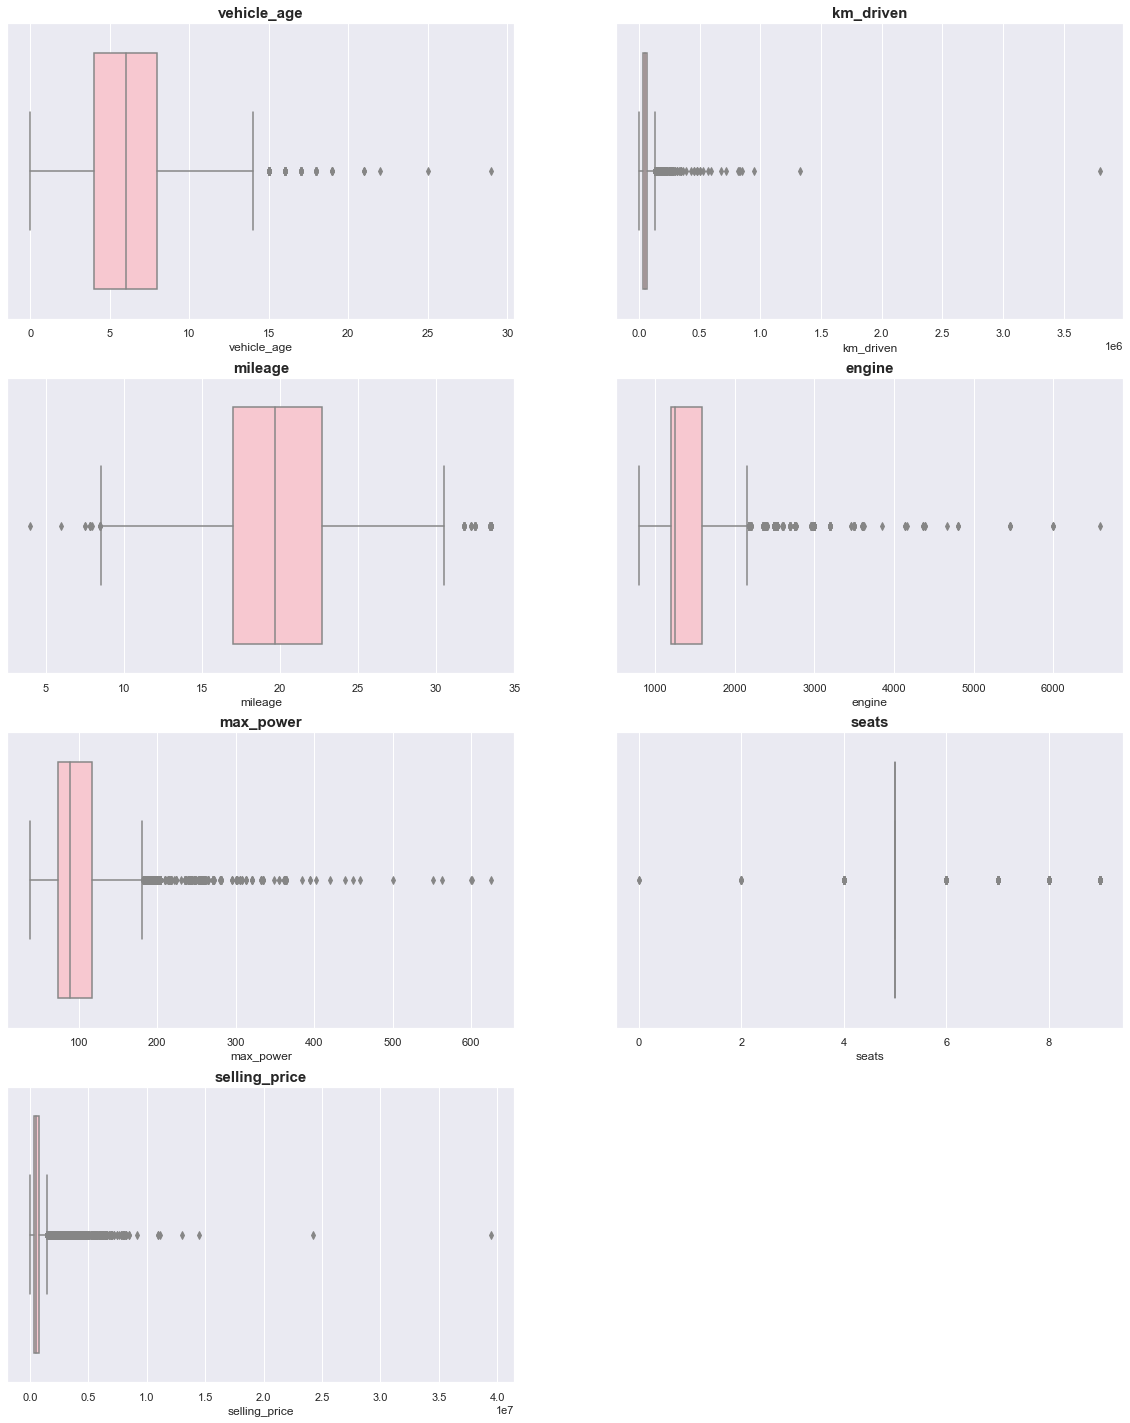

In [103]:
### Checking outliers in numerical features
plt.figure(figsize=(20,25))
for feature in enumerate(Numerical_features):
    plt.subplot(4, 2,feature[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=data, x=feature[1], color='pink')
    plt.title('{}'.format(feature[1]),fontsize=15,fontweight='bold')
plt.show();
    

# <span style='color:blue'> Observation </span>

1.Km driven, Max Power and Selling price has large no. of outliers on upper limit side.

2.Vehicle age and engine have less outliers as compared to above features.

3.Mileage has outliers on both sides.

# <span style='color:red'>  3.17 Regplot for Numerical features vs Dependent feature </span>

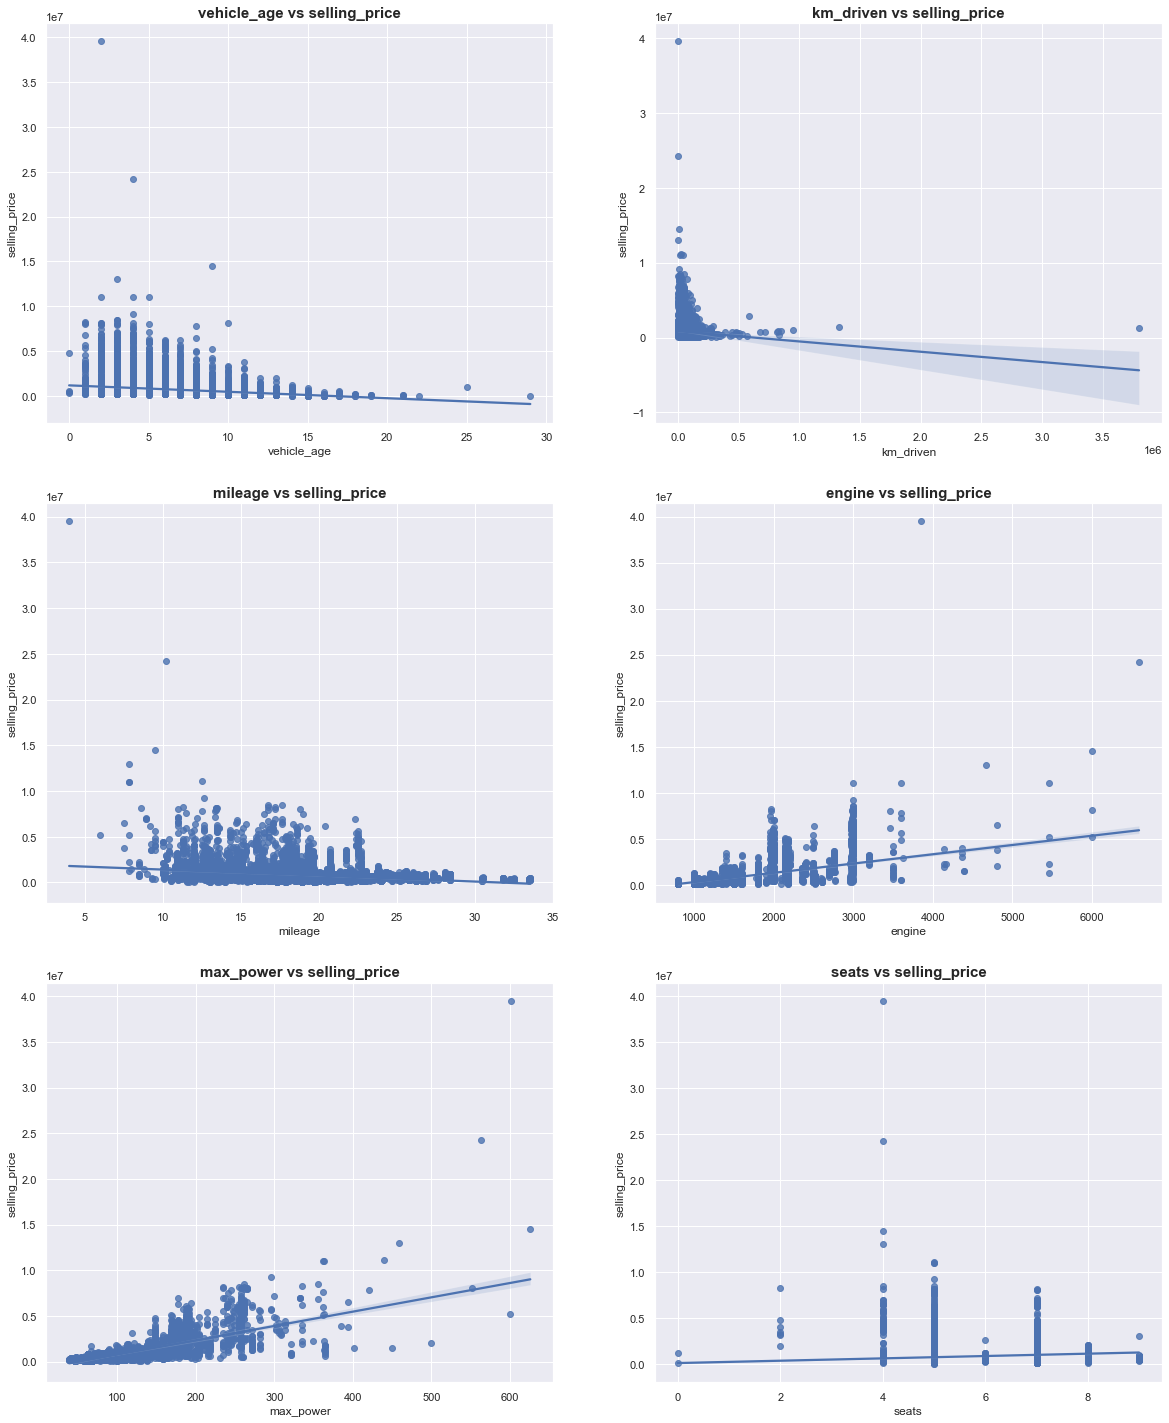

In [110]:
### plotting regplot for features vs dependent feature
plt.figure(figsize=(20,25))
for feature in enumerate([feature for feature in Numerical_features if feature not in ['selling_price']]):
    plt.subplot(3, 2, feature[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.regplot(data=data,x=feature[1],y='selling_price')
    plt.xlabel(feature[1])
    plt.ylabel('selling_price')
    plt.title('{} vs selling_price'.format(feature[1]),fontsize=15,fontweight='bold')
plt.show();

# <span style='color:red'> 3.18 Correlation between Numerical Features and Dependent Feature </span>

In [111]:
corr = round(data[Numerical_features].corr(),2)
corr

vehicle_age  km_driven  mileage  engine  max_power  seats  \
vehicle_age           1.00       0.33    -0.26    0.10       0.00   0.03   
km_driven             0.33       1.00    -0.10    0.19       0.04   0.19   
mileage              -0.26      -0.10     1.00   -0.63      -0.53  -0.44   
engine                0.10       0.19    -0.63    1.00       0.81   0.55   
max_power             0.00       0.04    -0.53    0.81       1.00   0.17   
seats                 0.03       0.19    -0.44    0.55       0.17   1.00   
selling_price        -0.24      -0.08    -0.31    0.59       0.75   0.12   

               selling_price  
vehicle_age            -0.24  
km_driven              -0.08  
mileage                -0.31  
engine                  0.59  
max_power               0.75  
seats                   0.12  
selling_price           1.00

<AxesSubplot:>

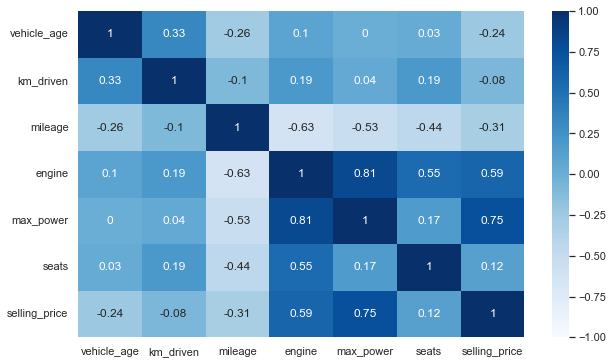

In [117]:
### Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(10,6)})
sns.heatmap(data=corr,vmin=-1,vmax=1,cmap='Blues',annot=True)

# <span style='color:blue'> Observation </span> 
    
1.Selling Price has negative correlation with vehicle age, Km driven, and Mileage.

2.Engine and Max power have moderate correlation with Selling Price.

3.Max Power and engine have high correlation.

4.Km Driven, Vehicle age and Seats have very less correlation with selling price.

# Practice

In [ ]:
3.11 Numerical features and categorical features vs Selling Price/3.15 Distribution of Numerical Features 
/3.16 Outliers in Numerical Features /3.17 Regplot for Numerical features vs Dependent feature 

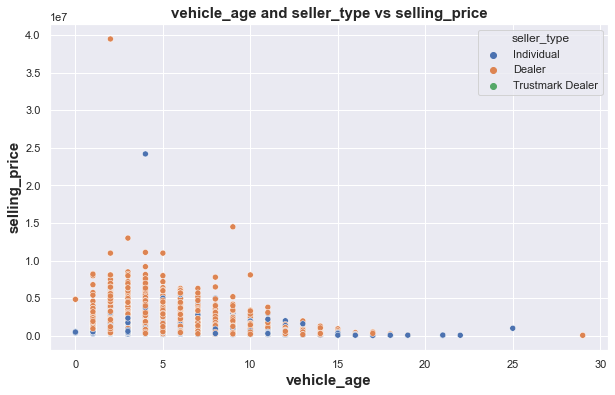

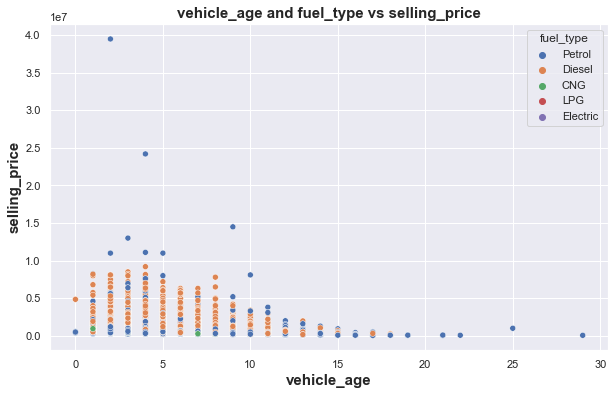

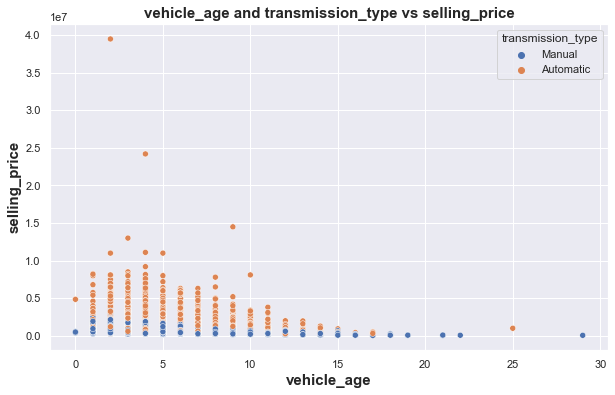

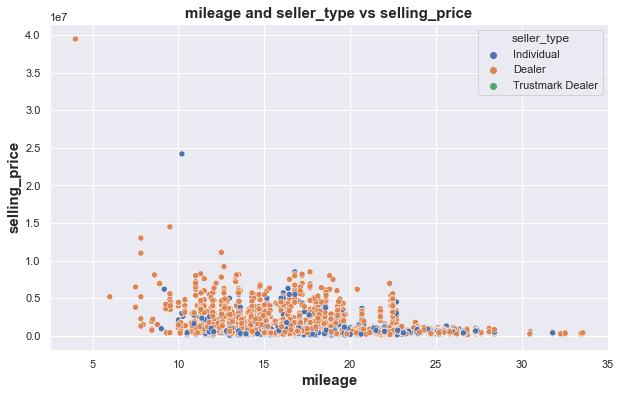

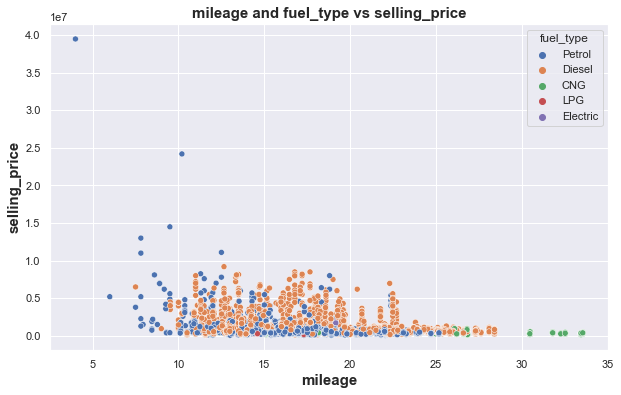

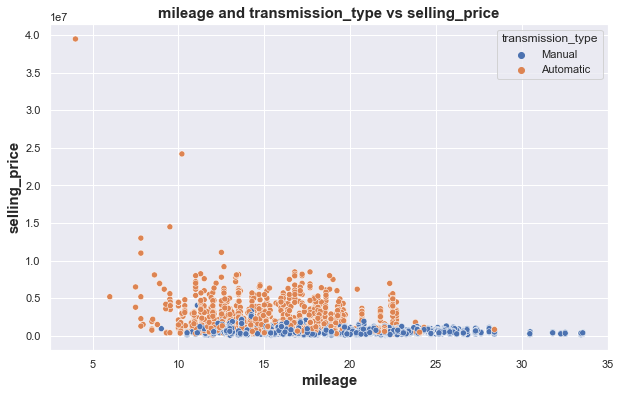

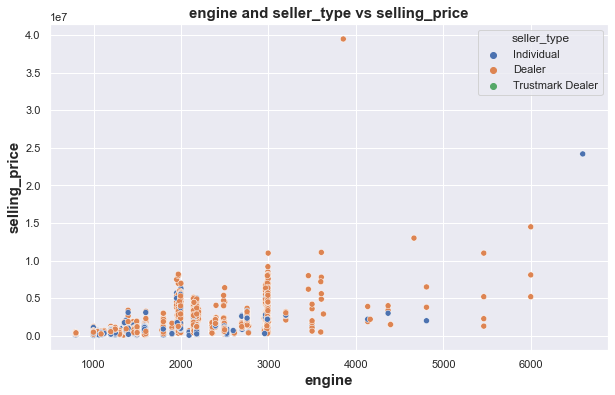

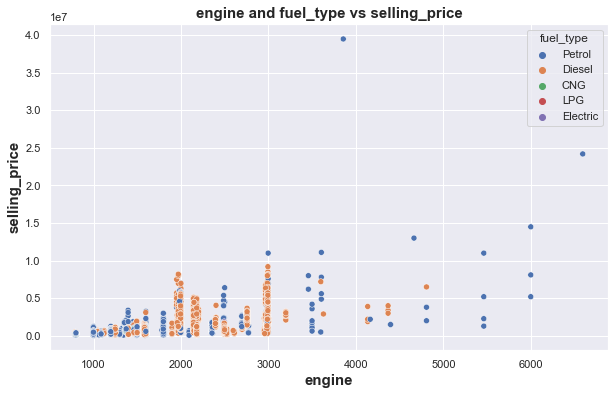

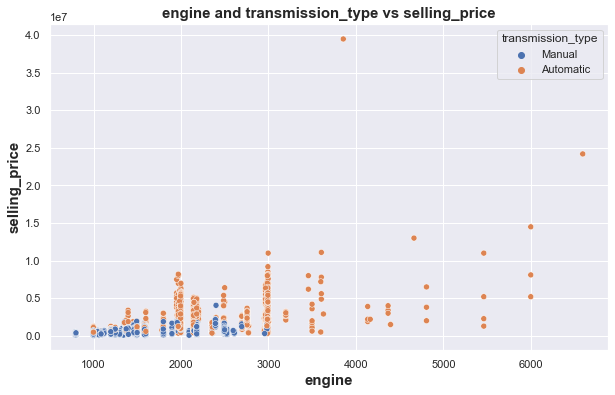

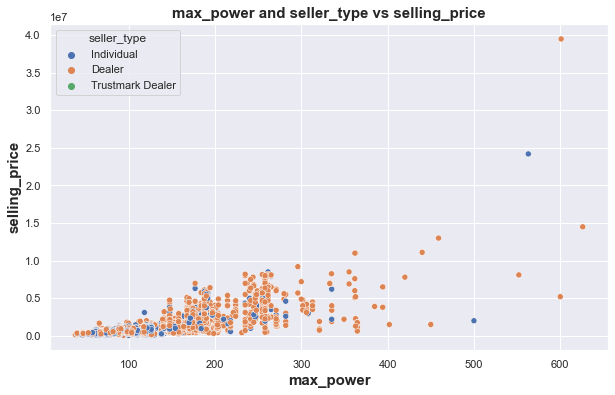

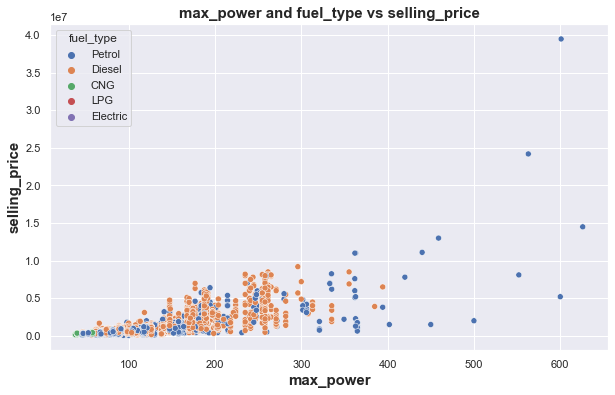

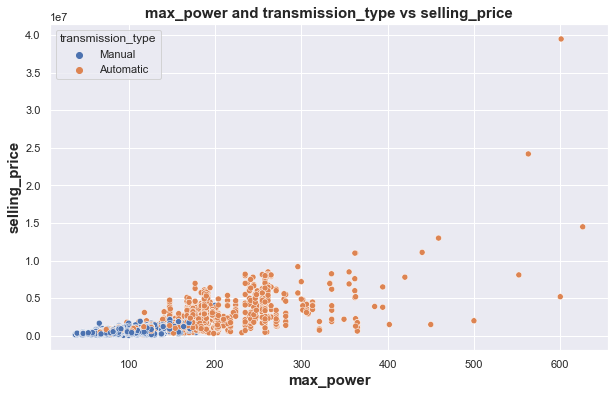

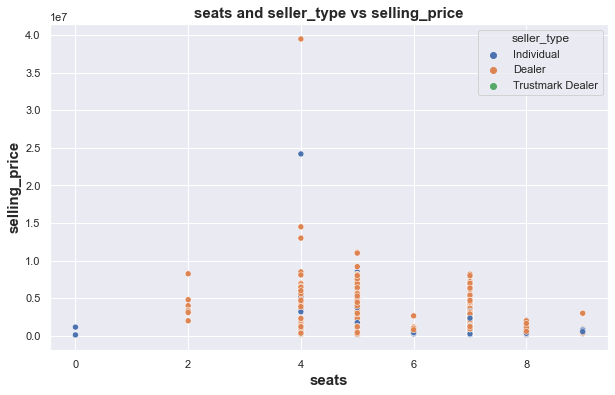

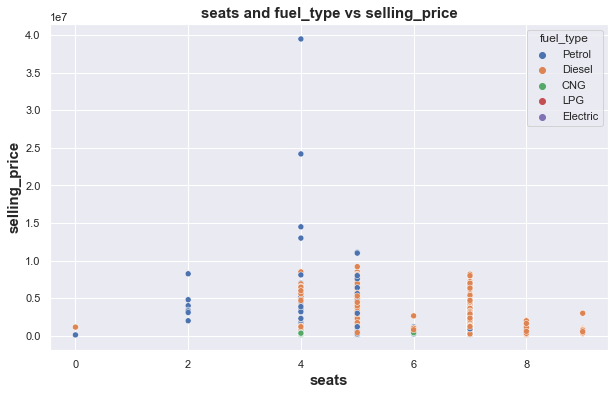

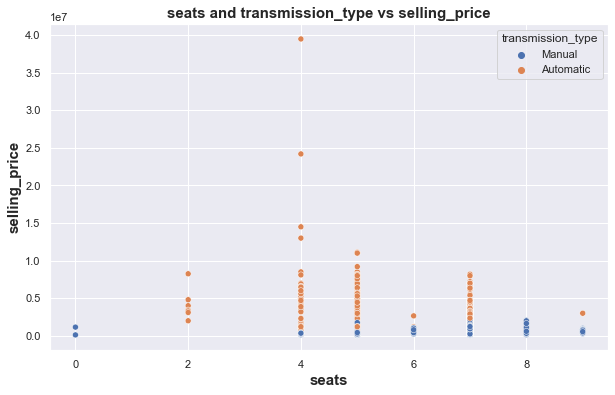

In [122]:
for i in [feature for feature in Numerical_features if feature not in ['selling_price','km_driven']]:
    for j in ['seller_type','fuel_type', 'transmission_type']:
        plt.figure(figsize=(10,6))
        sns.scatterplot(y=data['selling_price'],x=data[i],hue=data[j])
        plt.ylabel('selling_price',fontsize=15,fontweight='bold')
        plt.xlabel('{}'.format(i),fontsize=15,fontweight='bold')
        plt.title('{} and {} vs selling_price'.format(i,j),fontsize=15,fontweight='bold')
        plt.show();

In [ ]:
Distribution of Numerical Features

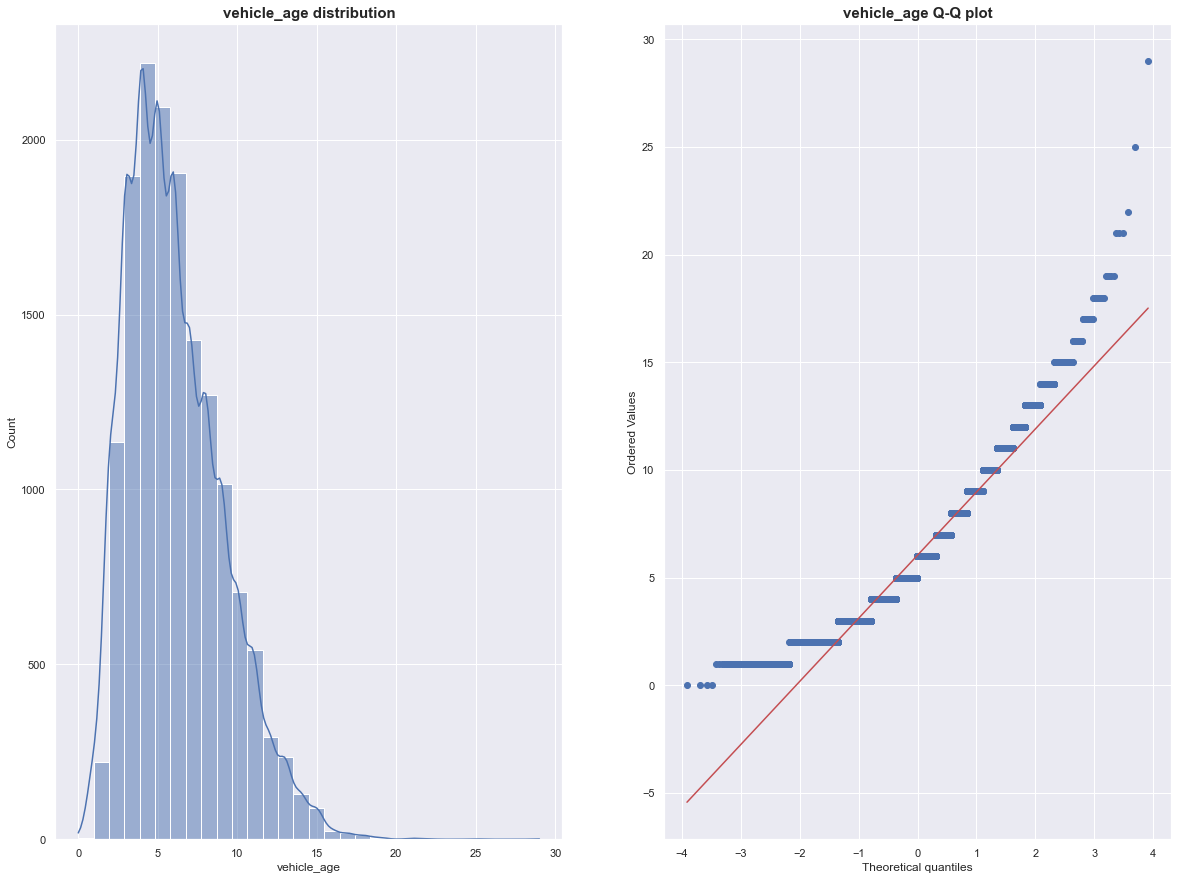

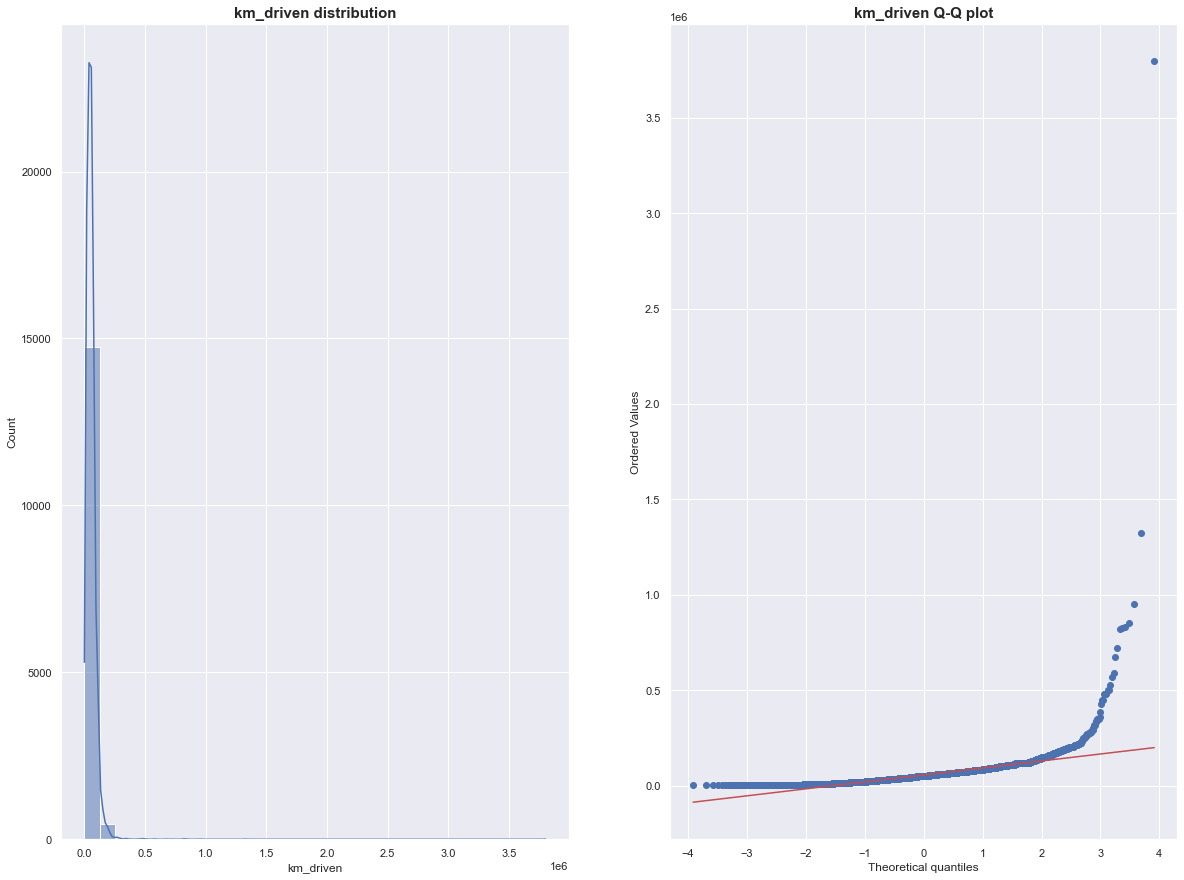

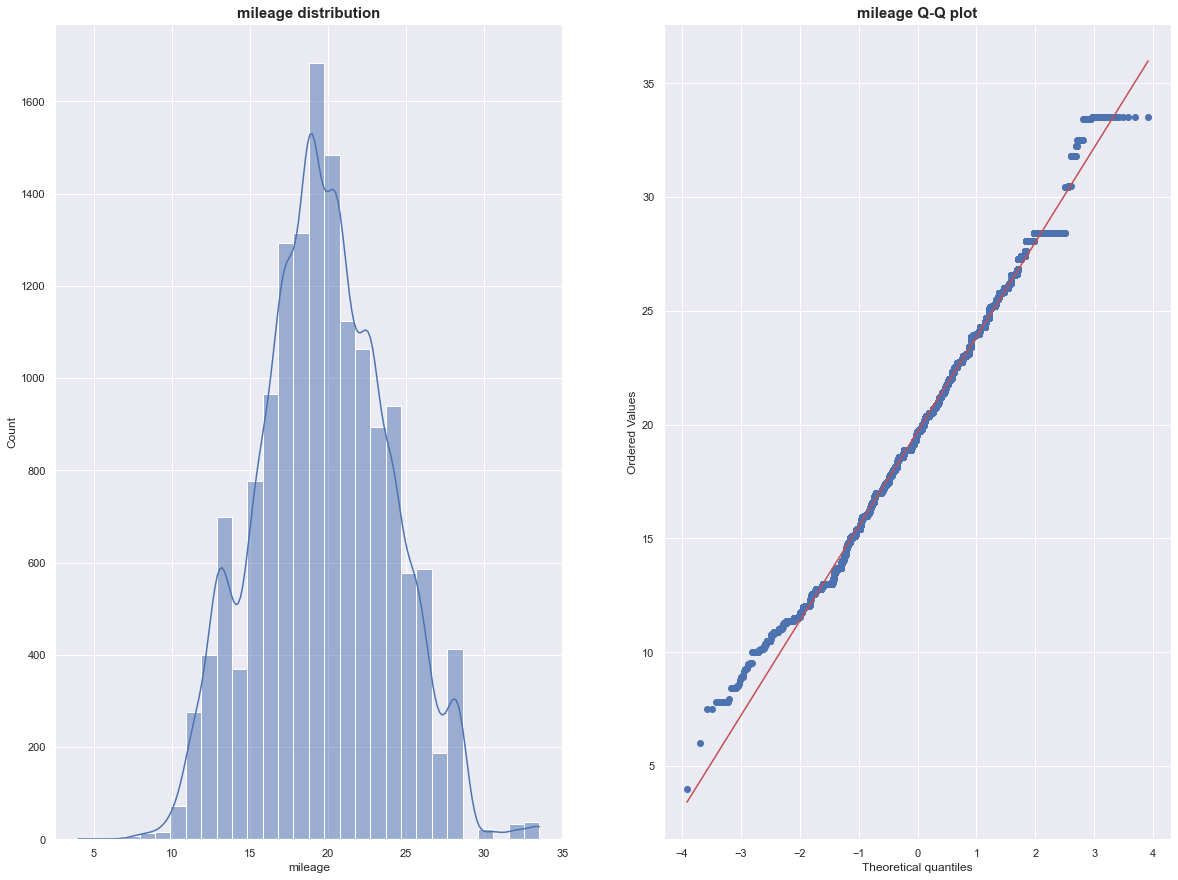

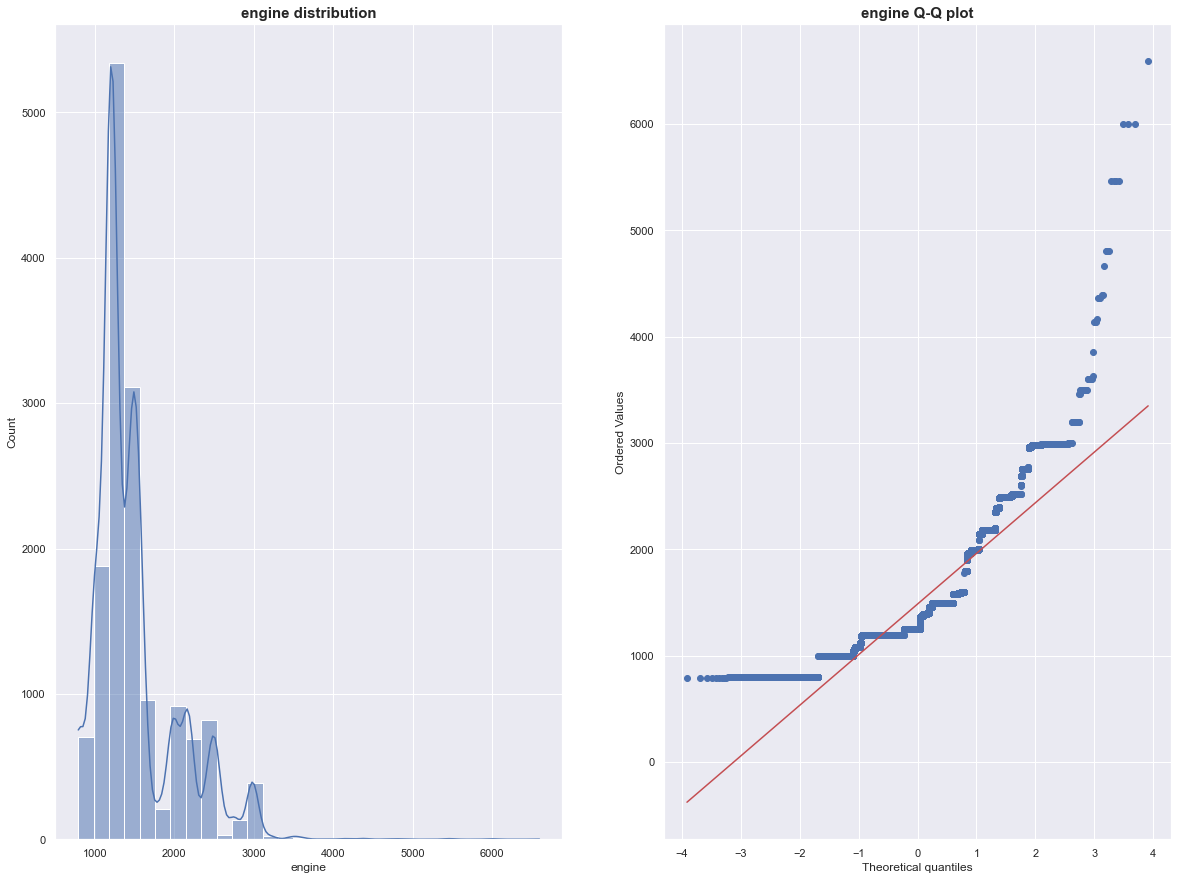

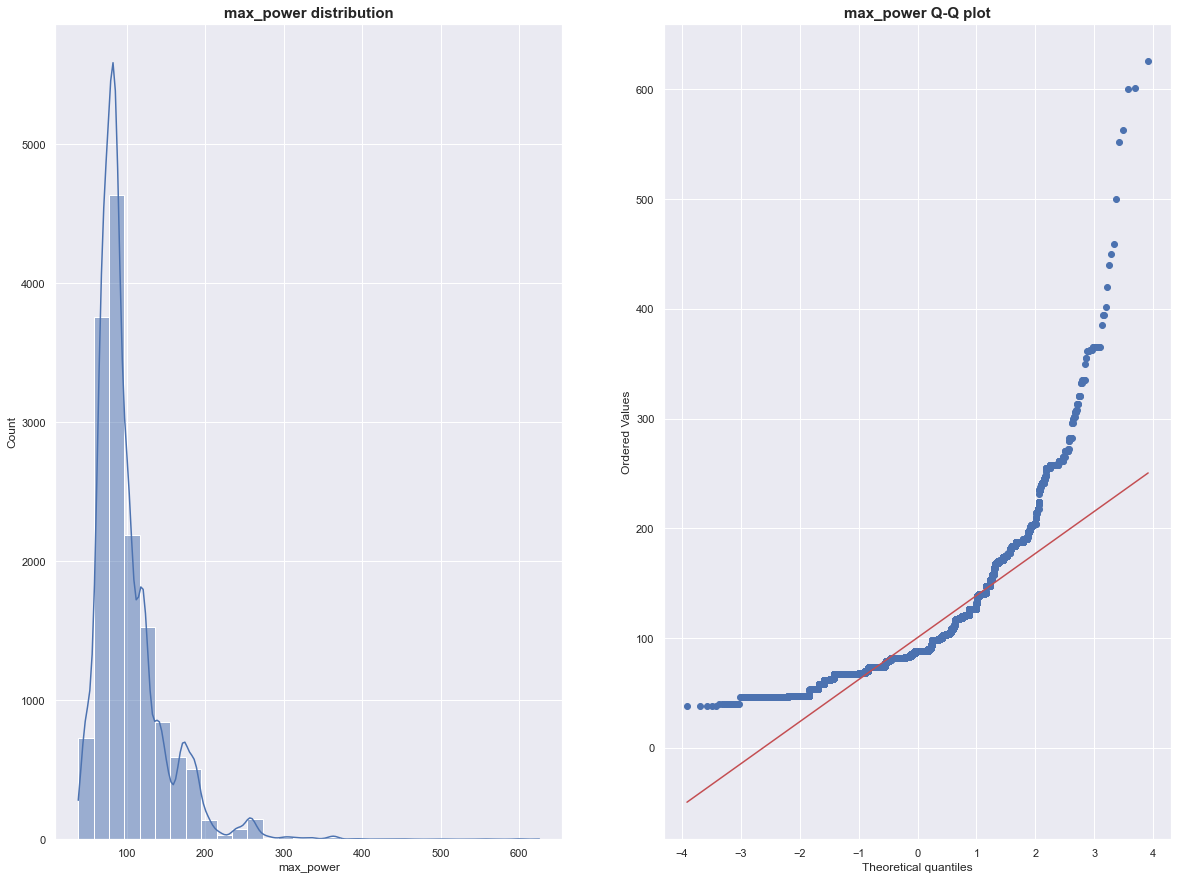

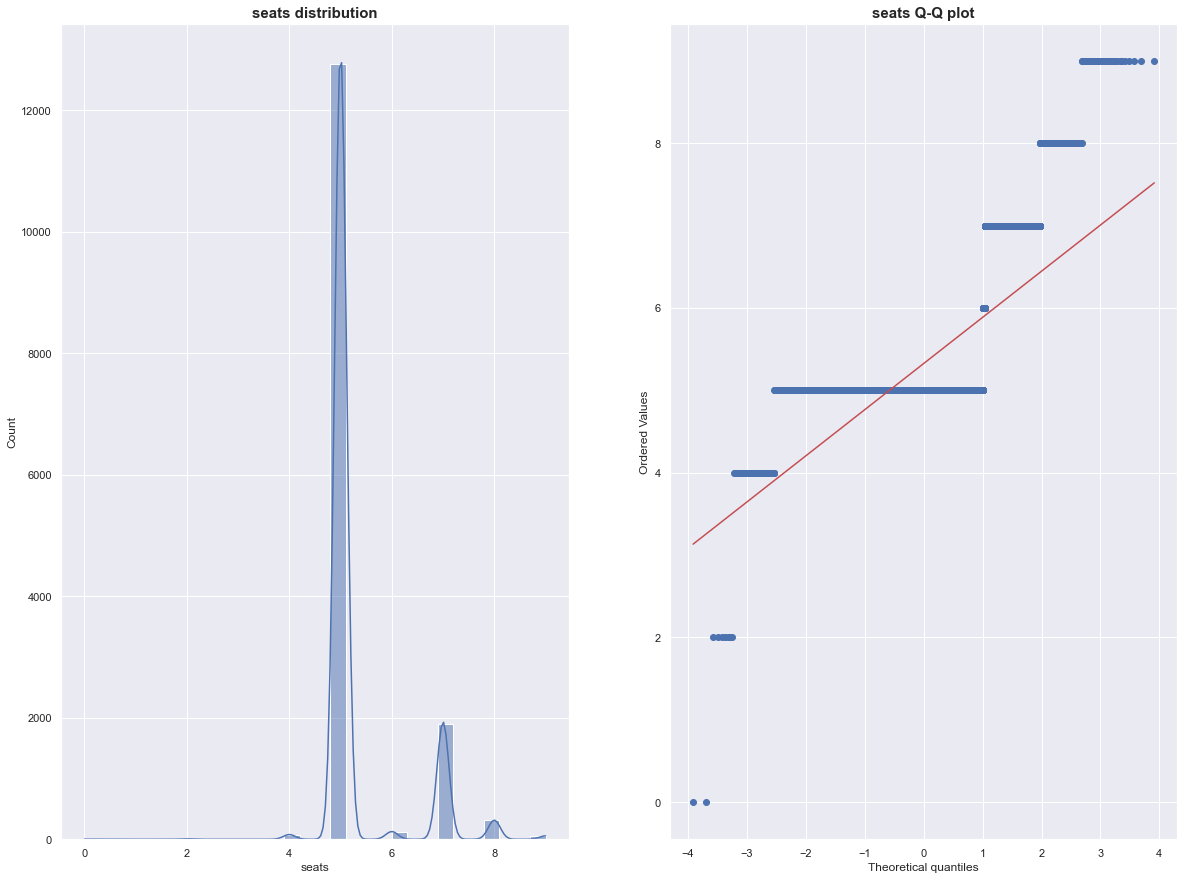

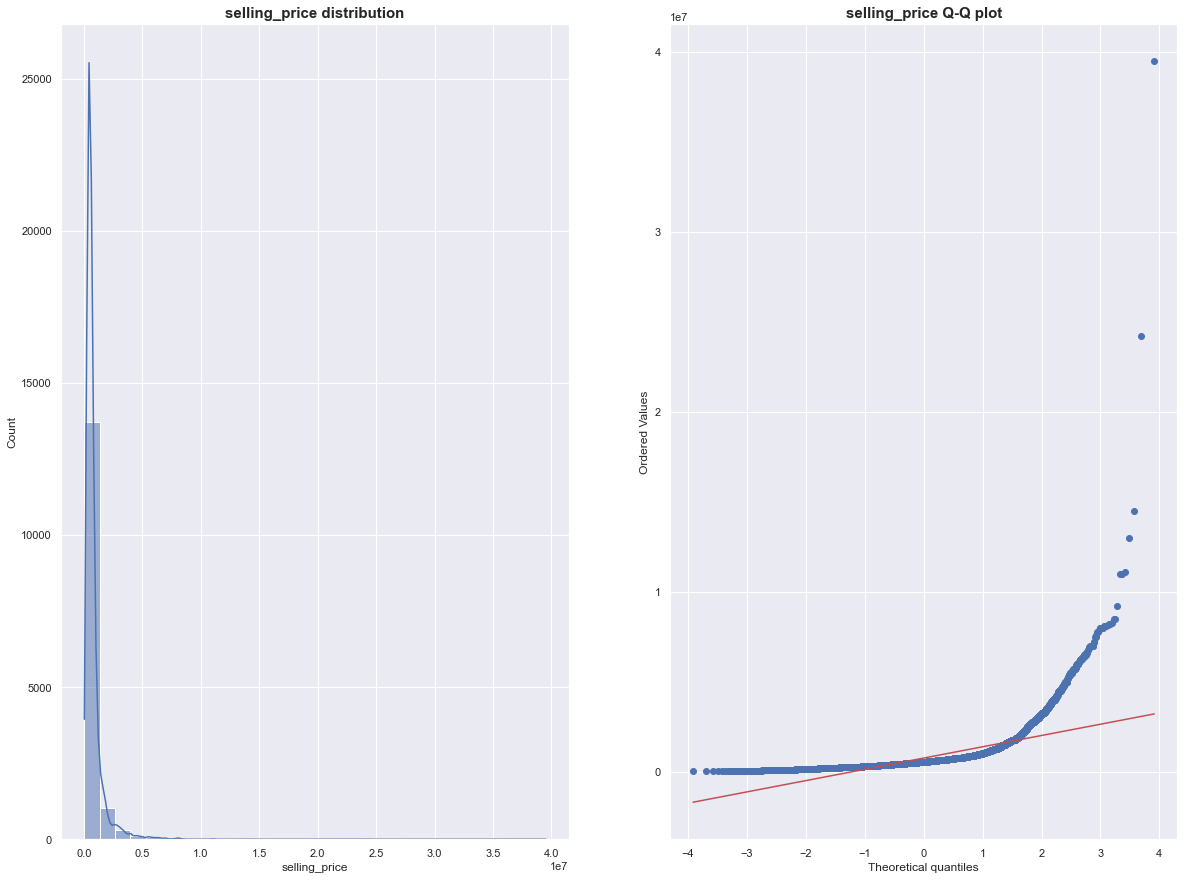

In [127]:

for feature in Numerical_features:
    plt.figure(figsize=(20,15))
    plt.subplot(121)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.histplot(data=data,x=feature,kde=True,bins=30)
    plt.title('{} distribution'.format(feature),fontsize=15,fontweight='bold')
    
    plt.subplot(122)
    stats.probplot(data[feature],dist='norm',plot=plt)
    plt.title('{} Q-Q plot'.format(feature),fontsize=15,fontweight='bold')
    plt.show();

In [ ]:
Outliers in Numerical Features

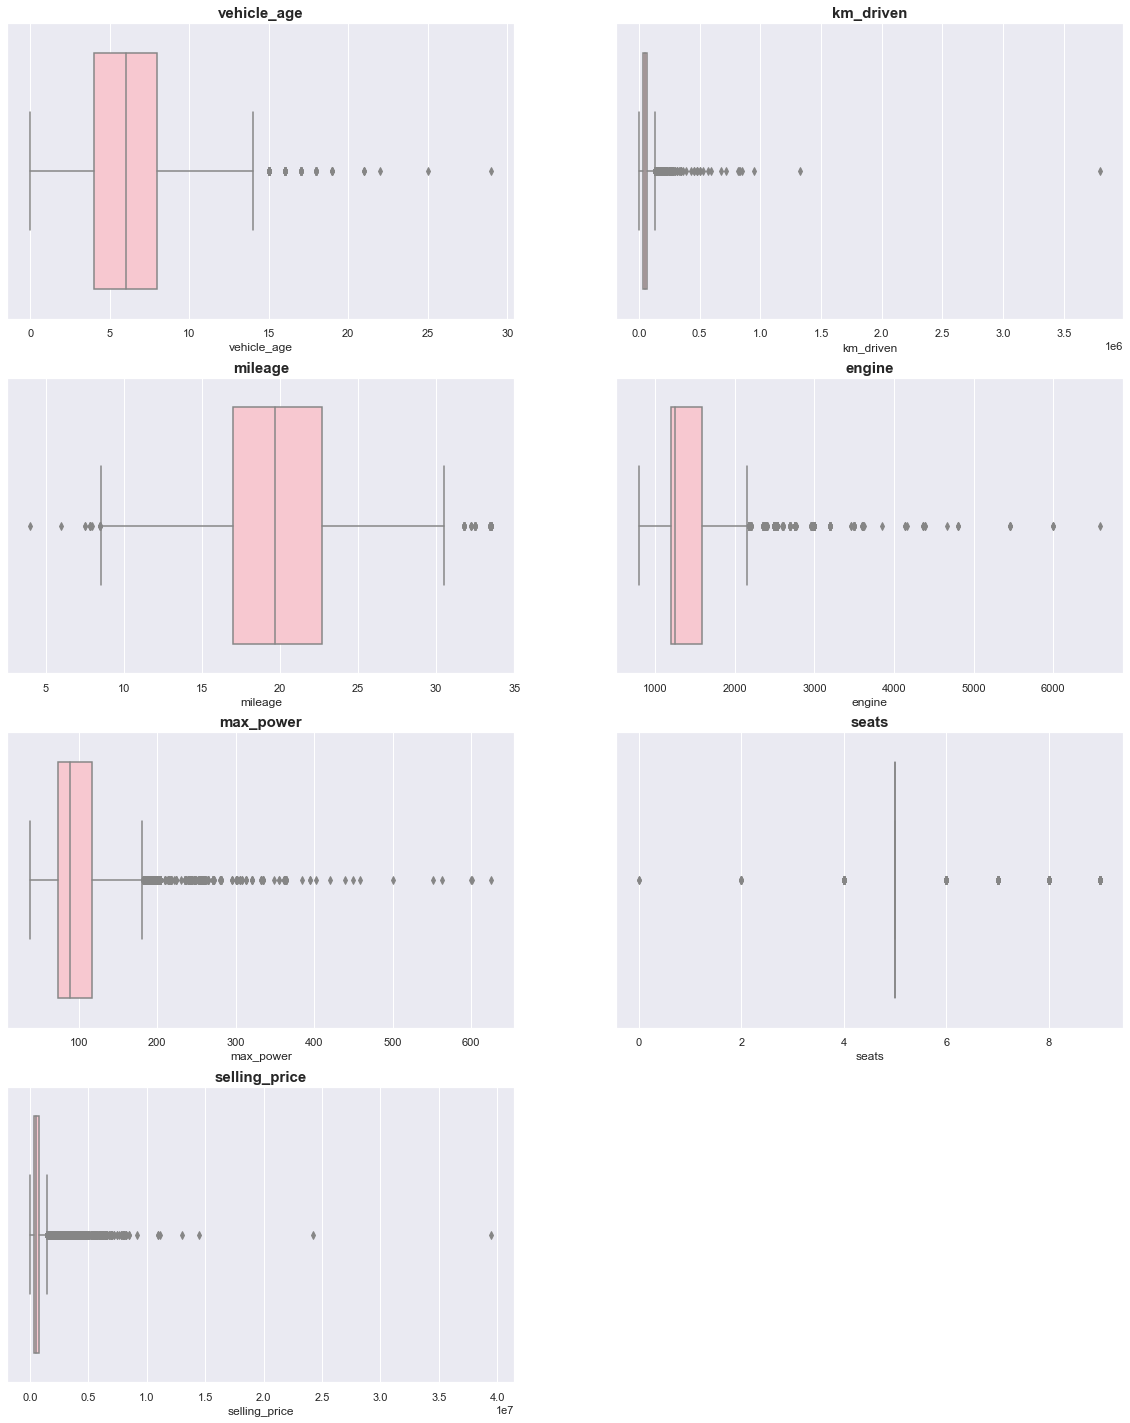

In [131]:
plt.figure(figsize=(20,25))
for feature in enumerate(Numerical_features):
    plt.subplot(4, 2 ,feature[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=data, x=feature[1],color='pink')
    plt.title('{}'.format(feature[1]),fontsize=15,fontweight='bold')
plt.show();

In [ ]:
Regplot for Numerical features vs Dependent feature 

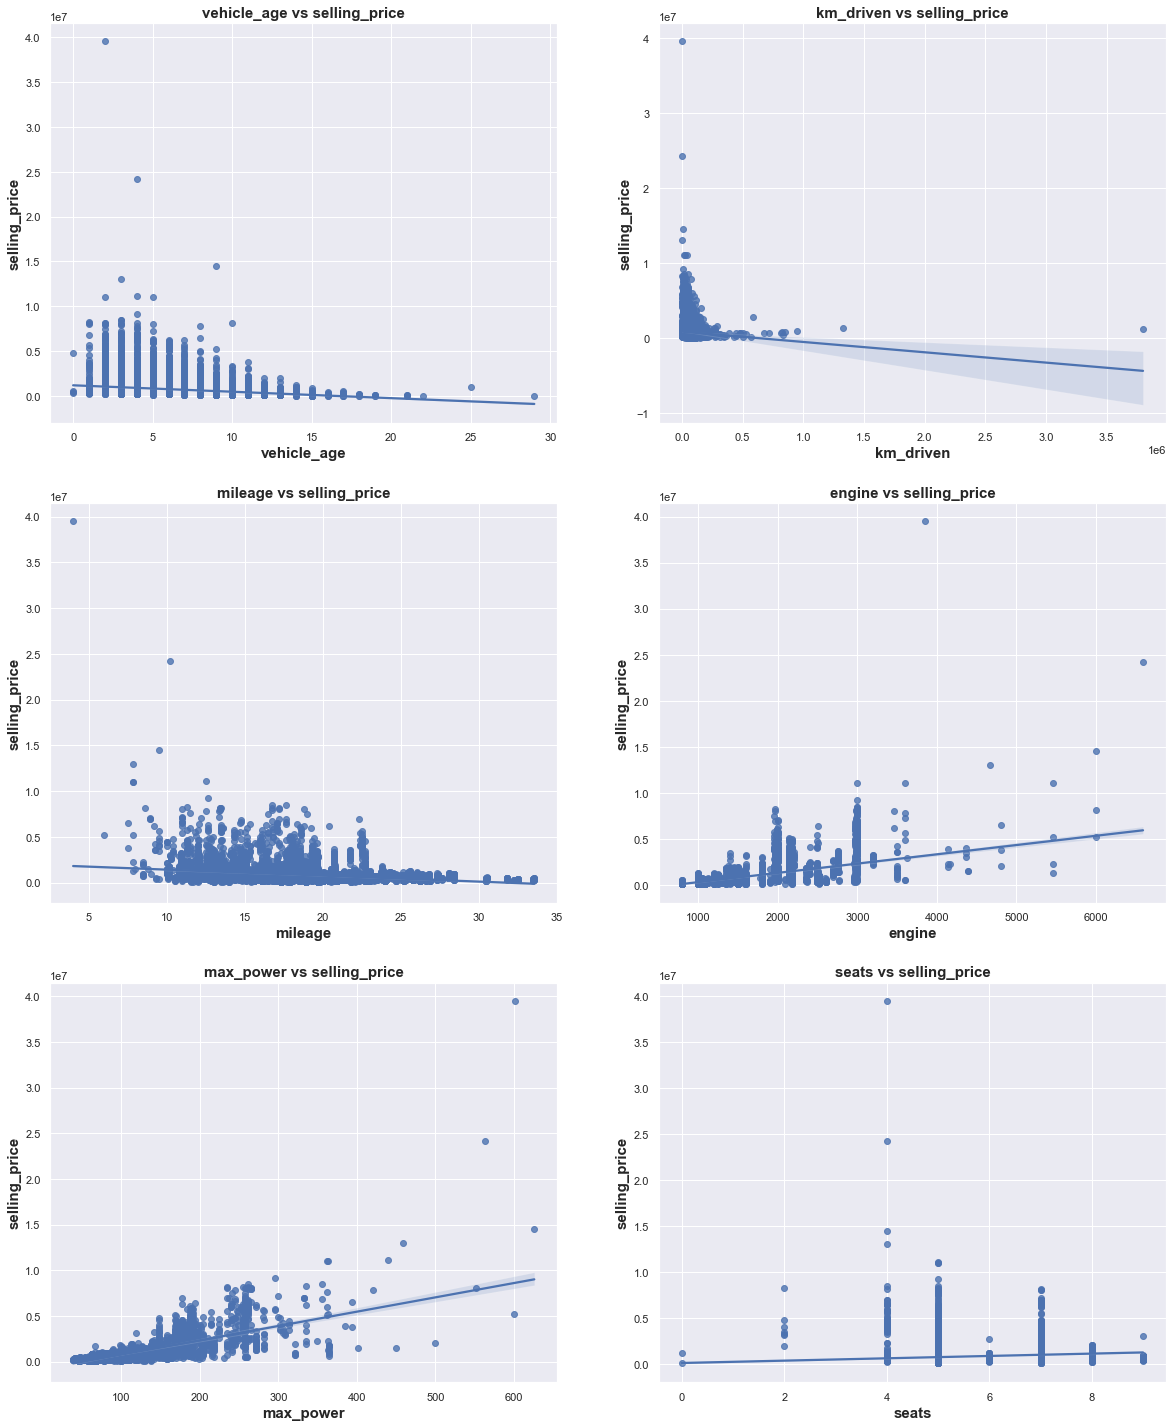

In [135]:
plt.figure(figsize=(20,25))
for feature in enumerate(feature for feature in Numerical_features if feature not in ['selling_price']):
    plt.subplot(3, 2 ,feature[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.regplot(data=data, x=feature[1],y='selling_price')
    plt.xlabel('{}'.format(feature[1]),fontsize=15,fontweight='bold')
    plt.ylabel('selling_price',fontsize=15,fontweight='bold')
    plt.title('{} vs selling_price'.format(feature[1]),fontsize=15,fontweight='bold')
plt.show();